In [2]:
from gymnasium import Env
from gymnasium.spaces import Box, Discrete
import numpy as np

In [4]:
observation_space = Box(low=np.array([0]), high=np.array([10]), shape = (1,), dtype=np.int16)
observation_space

Box(0, 10, (1,), int16)

In [5]:
observation_space.shape

(1,)

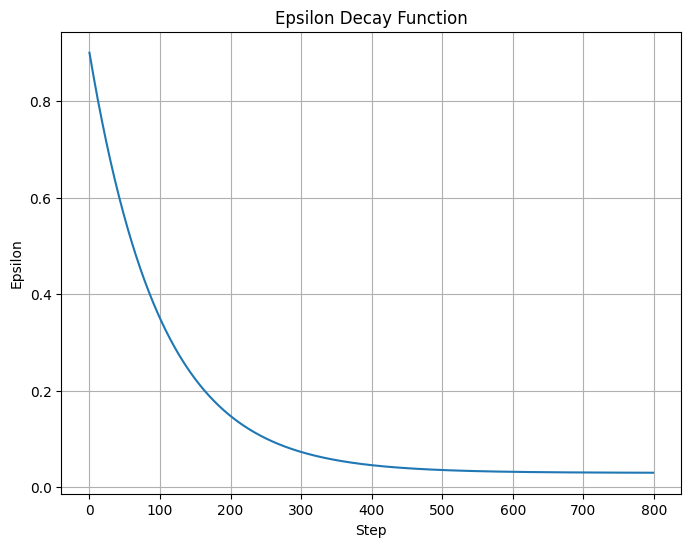

In [18]:
import matplotlib.pyplot as plt
import math

# Define the function
def epsilon_decay(x):
    EPS_START = 0.9
    EPS_END = 0.03
    EPS_DECAY = 100
    return EPS_END + (EPS_START - EPS_END) * np.exp(-1. * x / EPS_DECAY)

# Generate x values
x = range(0, 800)  # You can adjust the range as needed

# Calculate y values using the function
y = [epsilon_decay(xi) for xi in x]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('Step')
plt.ylabel('Epsilon')
plt.title('Epsilon Decay Function')
plt.grid(True)

# Show the plot
plt.show()

In [13]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


x = torch.tensor([[2.0,5.0,2.0],[4.0,5.0,4.0]])
y = torch.tensor([[1],[1]])
print(x[y])

x = torch.tensor([[2.0,5.0,2.0]])
y = torch.tensor([1])
print(x[y])

tensor([[[4., 5., 4.]],

        [[4., 5., 4.]]])


IndexError: index 1 is out of bounds for dimension 0 with size 1

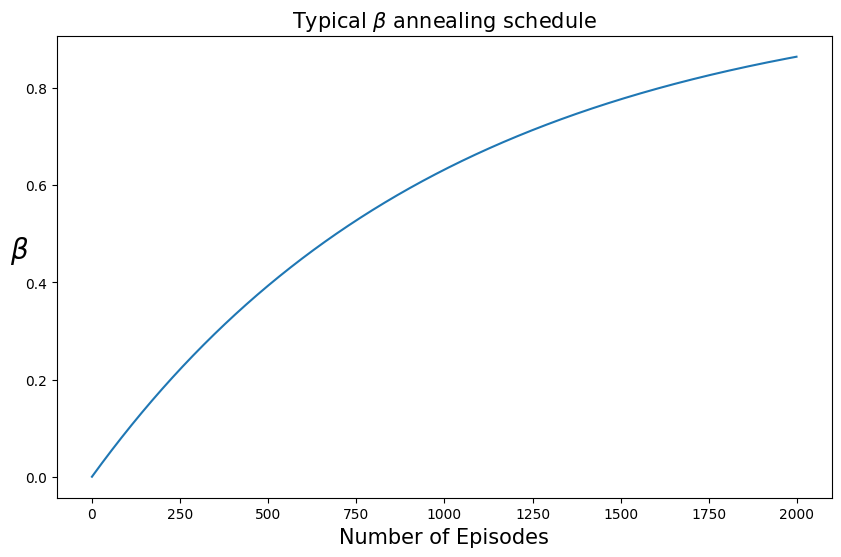

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def exponential_annealing_schedule(n, rate):
    return 1 - np.exp(-rate * n)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ns = np.arange(2000)
rate = 1e-3
_ = ax.plot(ns, exponential_annealing_schedule(ns, rate))
_ = ax.set_ylabel(r"$\beta$", rotation="horizontal", fontsize=20)
_ = ax.set_xlabel("Number of Episodes", fontsize=15)
_ = ax.set_title(r"Typical $\beta$ annealing schedule", fontsize=15)

In [40]:
from numpy import random
class Test():
    def __init__(self, seed = 42):
        random.seed(seed)
        pass

    def calculate_random_integer(self):
        return random.randint(0,10)

test = Test()
print(test.calculate_random_integer())
print(test.calculate_random_integer())

6
3


In [68]:
import numpy as np
from numpy import random

a = np.array([378.31,3.11,92.2])
b = np.array([(0.027160561080834984,0.1938059167167128),(0.015649339243994923,0.05599971858005176),(0.003897539654922594,0.010297427507850577)])
random.seed(7)

def calculate_next_price(last_value, t):
    avg_gbm, std_gbm = t
    return last_value * np.exp((avg_gbm - (std_gbm ** 2) / 2) + std_gbm * random.normal())

# Apply calculate_next_price to each element of a with the respective tuple in b
for i in range(6):
    a = calculate_next_price(a, b.T)
    print(a)

[529.39139928   3.46728908  94.18045892]
[487.75187256   3.42589256  94.09070675]
[494.99504627   3.4808667   94.48506379]
[540.18248421   3.61171766  95.24787056]
[467.49528346   3.50463141  94.84114185]
[471.61820685   3.55474162  95.20848748]


In [76]:
a = np.array([378.31,3.11,92.2])
b = np.array([10,0.5,3])
random.seed(7)
for i in range(6):
    print(random.normal(a,b))

[395.21525704   2.87703131  92.29846049]
[382.38516283   2.71553849  92.20619672]
[378.30109614   2.23263785  95.25297402]
[384.31498516   2.79728551  91.68535522]
[383.36299374   2.97932179  91.47175276]
[363.77758588   3.38729016  92.57164272]


In [5]:
import numpy as np
action = 2
AP = 2
last_crops = np.array([None,None,3,3,3])

print(np.where(last_crops[-AP:]==action))
    

(array([], dtype=int64),)


In [69]:
def get_penalty(last_crops_orig,action,AP):
    penalty = 1.0
    last_crops = np.append(last_crops_orig,[action])
    i = 0
    while len(last_crops)-i-1 >= 0:
        window_start = max(0,len(last_crops)-AP-i-1)
        window_end = len(last_crops)-i-1
        test = (last_crops[window_end],window_end)
        if last_crops[window_end] != action:
            i+=1
            continue
        break_indices = np.where(last_crops[window_start:window_end]==action)[0]
        if len(break_indices) != 0:
            last_break_index = break_indices[-1]
            penalty *= 1-0.1*AP*(last_break_index+1)/AP
            i+=1
        else:
            i+=1
            break
    return penalty

import numpy as np
action = 1
AP = 3
last_crops_list = np.array([[None,None,None,None,None],[1,1,1,1,1],[None,3,3,1,1],[None,None,1,3,1],[None,1,3,1,1],[None,None,3,1,3],[3,1,1,3,3],[1,1,1,3,1]]) #
for last_crops_orig in last_crops_list:
    penalty = get_penalty(last_crops_orig,action, AP)
    print(last_crops_orig, np.round(penalty,3))
# last_crops = last_crops_list[0]



    

[None None None None None] 1.0
[1 1 1 1 1] 0.247
[None 3 3 1 1] 0.49
[None None 1 3 1] 0.56
[None 1 3 1 1] 0.392
[None None 3 1 3] 0.8
[3 1 1 3 3] 0.72
[1 1 1 3 1] 0.403


In [67]:
ts = [(2,1,2),(2,1,3),(3,1,3),(2,1,4),(3,1,4),(4,1,4),(3,2,4),(4,2,4),(4,3,4)]
for t in ts:
    count, mf_group_max_count, mf_group_window_length = t
    penalty = 1-(count/mf_group_window_length - mf_group_max_count/mf_group_window_length)
    print(t, penalty)

(2, 1, 2) 0.5
(2, 1, 3) 0.6666666666666667
(3, 1, 3) 0.33333333333333326
(2, 1, 4) 0.75
(3, 1, 4) 0.5
(4, 1, 4) 0.25
(3, 2, 4) 0.75
(4, 2, 4) 0.5
(4, 3, 4) 0.75


In [75]:
def get_multi_AP_penalty(last_crops_orig,action,AP, relevant_crops):
    penalty = 1.0
    last_crops = np.append(last_crops_orig,[action])
    i = 0
    while len(last_crops)-i-1 >= 0:
        window_start = max(0,len(last_crops)-AP-i-1)
        window_end = len(last_crops)-i-1
        if last_crops[window_end] not in relevant_crops:
            i+=1
            continue
        break_indices = np.where(np.isin(last_crops[window_start:window_end],relevant_crops))[0]
        if len(break_indices) != 0:
            last_break_index = break_indices[-1]
            penalty *= 1-0.1*AP*(last_break_index+1)/AP
            i+=1
        else:
            i+=1
            break
    return penalty

import numpy as np
action = 1
relevant_crops = [1,2,4]
AP = 3
last_crops_list = np.array([[None,None,None,None,None],[1,1,1,1,1],[1,2,2,1,1],[None,3,3,2,1],[None,3,3,4,1],[None,None,2,3,1],[None,4,3,2,1],[None,None,3,4,3],[3,2,1,3,3],[4,4,2,3,1]]) #
for last_crops_orig in last_crops_list:
    penalty = get_multi_AP_penalty(last_crops_orig,action, AP, relevant_crops)
    print(last_crops_orig, np.round(penalty,3))

[None None None None None] 1.0
[1 1 1 1 1] 0.247
[1 2 2 1 1] 0.247
[None 3 3 2 1] 0.49
[None 3 3 4 1] 0.49
[None None 2 3 1] 0.56
[None 4 3 2 1] 0.392
[None None 3 4 3] 0.8
[3 2 1 3 3] 0.72
[4 4 2 3 1] 0.403


In [13]:
import numpy as np
week = 10.
latest_sowing = 5.
print(max(0.0,1.+((latest_sowing - 1. - week)*0.2)))

-0.20000000000000018
0.0


In [12]:
import numpy as np
a = np.zeros((2,3))
b = 2

a = a[1:,:]
print(a)
print(a.shape)
bm = np.zeros((1,a.shape[1]))
bm[0,b] = 1
print(np.concatenate((a,bm),axis=0))

[[0. 0. 0.]]
(1, 3)
[[0. 0. 0.]
 [0. 0. 1.]]


In [21]:
import numpy as np

a = np.array([[1, 2, 3, 4, 5]])
b = np.array([0, 1, 2]).reshape((1,3))
print(b)
mask = np.ones_like(a, dtype=bool)
print(mask)
mask[0][b] = False
a[~mask] = 0

print(a)

[[0 1 2]]
[[ True  True  True  True  True]]
[[0 0 0 4 5]]


c:\Users\Magnus\Documents\GitHub\cro_symbolic_mbpo


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'KLEEGRAS'),
  Text(1, 0, 'LUZERNE'),
  Text(2, 0, 'ACKERBOHNE'),
  Text(3, 0, 'KOERNERERBSE'),
  Text(4, 0, 'SOJABOHNE'),
  Text(5, 0, 'FUTTERLUPINE'),
  Text(6, 0, 'WINTERWEIZEN'),
  Text(7, 0, 'SOMMERWEIZEN'),
  Text(8, 0, 'WINTERHARTWEIZEN'),
  Text(9, 0, 'WINTERDINKEL'),
  Text(10, 0, 'WINTERTRITICALE'),
  Text(11, 0, 'WINTERROGGEN'),
  Text(12, 0, 'WINTERGERSTE'),
  Text(13, 0, 'SOMMERGERSTE'),
  Text(14, 0, 'SOMMERHAFER'),
  Text(15, 0, 'HIRSE'),
  Text(16, 0, 'SILOMAIS'),
  Text(17, 0, 'KOERNERMAIS'),
  Text(18, 0, 'ZUCKERRUEBEN'),
  Text(19, 0, 'KARTOFFELN'),
  Text(20, 0, 'WINTERRAPS'),
  Text(21, 0, 'SONNENBLUMEN'),
  Text(22, 0, 'OELKUERBIS'),
  Text(23, 0, 'GRASSILAGE')])

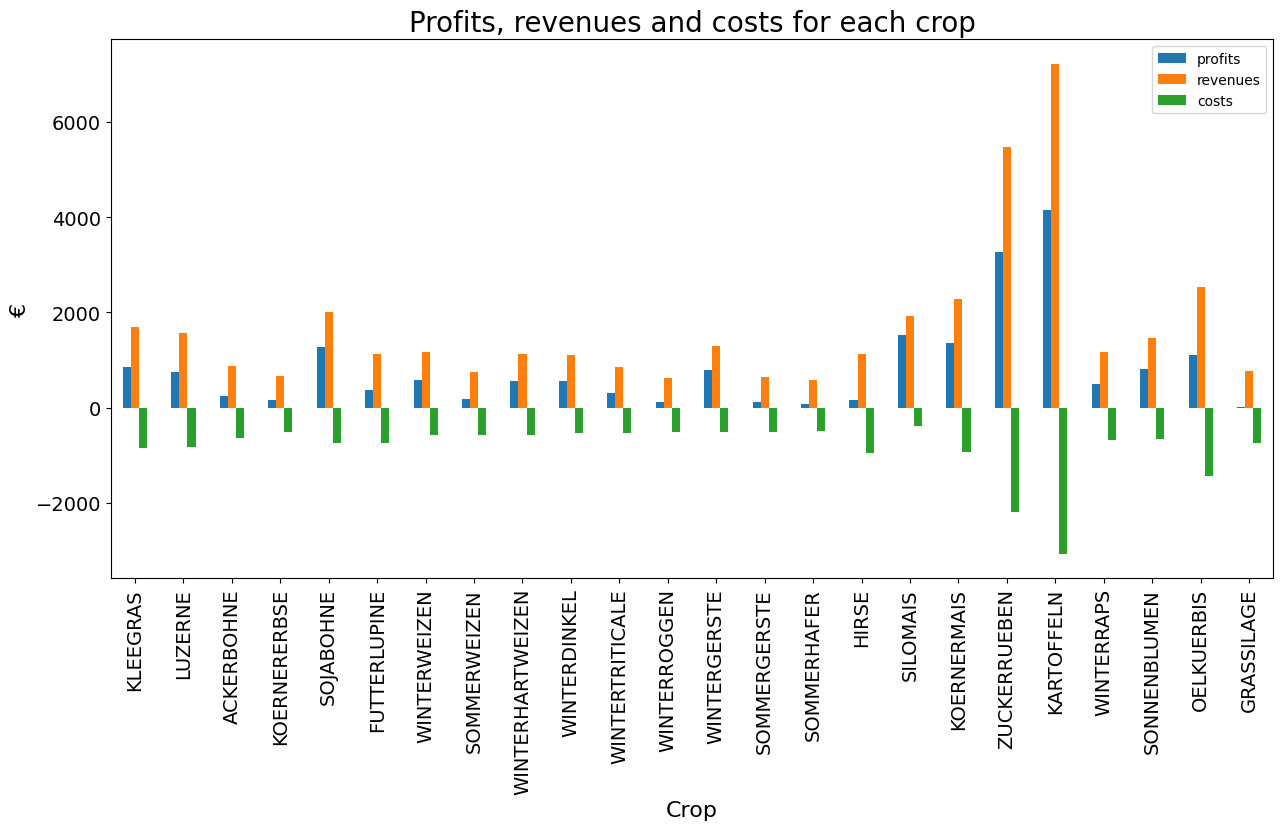

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
from numpy import random
from simulation_env.environment_maincrops.data.mappings import crop_mapping_german, crop_mapping_german_rev, crop_mapping_eng, date_mapping, date_mapping_rev
region = "Bundesgebiet"
print(os.getcwd())
json_file_path = "./simulation_env/environment_maincrops/data/maincrops_updated.json"
# Open and read the JSON file
with open(json_file_path, "r") as json_file:
    # Parse the JSON data into a Python dictionary
    maincrop_yields = json.load(json_file)
seed = 42
N=50
P=0
K=0
yields = np.array([random.normal(maincrop_yields[crop_name]["Ertrag"][region]["avg"], maincrop_yields[crop_name]["Ertrag"][region]["std"]) for crop_name in maincrop_yields.keys()])
prices_avg = np.array([crop["Verkaufspreis"]["avg"] for crop in maincrop_yields.values()])
prices_std = np.array([crop["Verkaufspreis"]["std"] for crop in maincrop_yields.values()])
prices = random.normal(prices_avg,prices_std)
sowing_costs_avg = np.array([crop["Kosten"]["Saatgut"]["avg"] for crop in maincrop_yields.values()])

other_costs_avg = np.array([crop["Kosten"]["Sonstiges"]["avg"] for crop in maincrop_yields.values()])

N_costs_avg = maincrop_yields["WINTERWEIZEN"]["Kosten"]["Duenger N"]["avg"]

P_costs_avg = maincrop_yields["WINTERWEIZEN"]["Kosten"]["Duenger P"]["avg"]

K_costs_avg = maincrop_yields["WINTERWEIZEN"]["Kosten"]["Duenger K"]["avg"]

average_N_fertilization_needs = np.array([max(maincrop_yields[crop_name]["Duengebedarf N"]["Value"] - N,0.0) for crop_name in maincrop_yields.keys()])
max_N_fertilization_needs = np.ones_like(average_N_fertilization_needs)*170.0
average_N_fertilization_needs = np.minimum(average_N_fertilization_needs,max_N_fertilization_needs)
average_P_fertilization_needs = np.array([max(maincrop_yields[crop_name]["Duengebedarf P"]["Value"] - P,0.0) for crop_name in maincrop_yields.keys()])
average_K_fertilization_needs = np.array([max(maincrop_yields[crop_name]["Duengebedarf K"]["Value"] - K,0.0) for crop_name in maincrop_yields.keys()])


average_N_fertilization_costs = N_costs_avg * average_N_fertilization_needs
average_P_fertilization_costs = P_costs_avg * average_P_fertilization_needs
average_K_fertilization_costs = K_costs_avg * average_K_fertilization_needs

# Calculate profits
average_revenues = yields * prices_avg
average_profits = yields * prices_avg - sowing_costs_avg - other_costs_avg - average_N_fertilization_costs - average_P_fertilization_costs - average_K_fertilization_costs
average_costs = -(sowing_costs_avg + other_costs_avg + average_N_fertilization_costs + average_P_fertilization_costs + average_K_fertilization_costs)

# Create a dataframe with the profits, revenues and costs for each crop
df = pd.DataFrame({"crop": list(maincrop_yields.keys()), "revenues": average_revenues, "costs": average_costs, "profits": average_profits})

# Plot profits next to revenues and costs for each crop in a barchart from the dataframe
df.plot.bar(x="crop", y=["profits", "revenues", "costs"], figsize=(15, 7), fontsize=14, rot=0)
plt.title("Profits, revenues and costs for each crop", fontsize=20)
plt.xlabel("Crop", fontsize=16)
plt.ylabel("€", fontsize=16)
# Make the x-labels more readable by making them vertical
plt.xticks(rotation=90)



In [9]:
import numpy as np
import torch
m_init = torch.arange(0,5).unsqueeze(0)
m = torch.clone(m_init)
for  i in range(3):
    m = torch.concatenate((m,m_init+5*(i+1)))
m.flatten().reshape(4,m_init.shape[1])

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])

In [21]:
import numpy as np
x = np.array([0.2,0.3,0.4,0.5,0.6])
l = len(x)
alpha = 0.2
x_alpha = x**alpha/np.sum(x**alpha)
beta = 0.8
print(x_alpha)
print((x_alpha*l)**-beta)

[0.17605555 0.19092727 0.20223472 0.21146462 0.21931784]
[1.10739925 1.03783813 0.99115009 0.95638735 0.92889115]


# Plot results


### Helpers

In [10]:
import copy
from functools import partial
def lpf(x, omega_c, T):
    """Implement a first-order low-pass filter.

    The input data is x, the filter's cutoff frequency is omega_c
    [rad/s] and the sample time is T [s].  The output is y.
    """
    y = copy.deepcopy(x)
    alpha = (2 - T * omega_c) / (2 + T * omega_c)
    beta = T * omega_c / (2 + T * omega_c)
    for k in range(1, len(x)):
        y[k] = alpha * y[k - 1] + beta * (x[k] + x[k - 1])
    return y


def calculate_lpf_iqr(raw_data, omega_c, T):
    lpf_partial = partial(lpf, omega_c=omega_c, T=T)
    data_lpf = np.apply_along_axis(lpf_partial,1,raw_data)
    upper_quartile = np.quantile(data_lpf,0.75,axis=0)
    lower_quartile = np.quantile(data_lpf,0.25,axis=0)
    iqr = upper_quartile - lower_quartile
    return iqr

def calculate_iqr_across_time_window(single_row, window_length):
    # print(single_row.shape)
    result = np.empty(single_row.shape[0]-window_length)
    for i in range(window_length,single_row.shape[0]):
        window = single_row[(i-window_length):i]
        upper_quartile = np.quantile(window,0.75)
        lower_quartile = np.quantile(window,0.25)
        iqr = upper_quartile - lower_quartile
        # if abs(iqr) > 200000 or math.isnan(iqr):
        #     print(upper_quartile,lower_quartile)
        result[i-window_length] = iqr
    return result

# Standard Result function

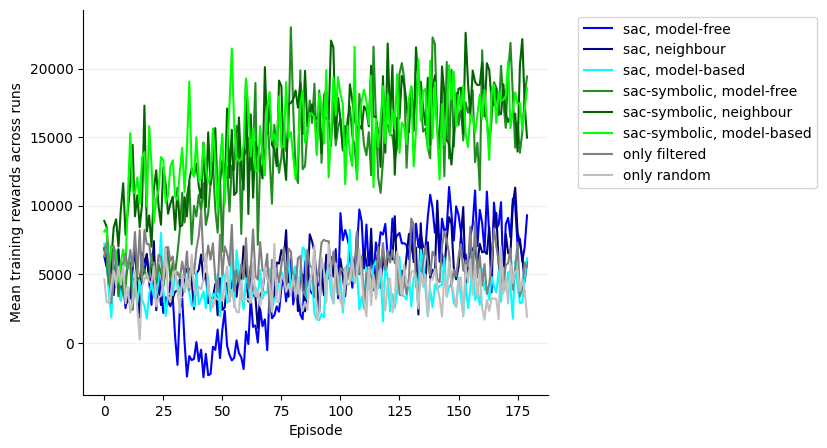

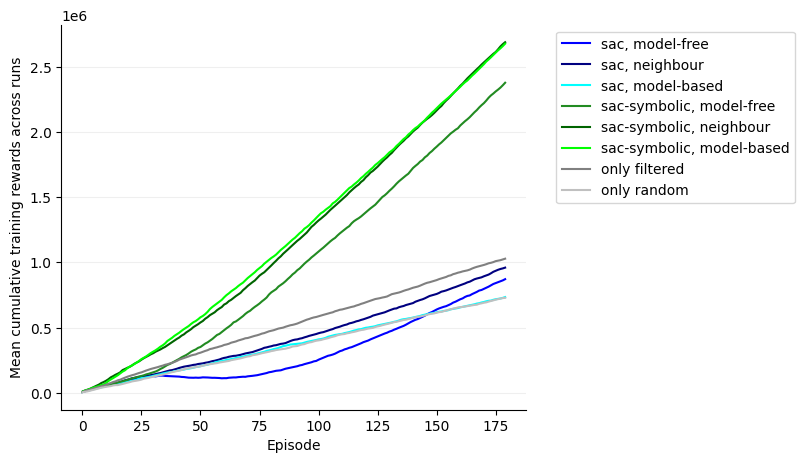

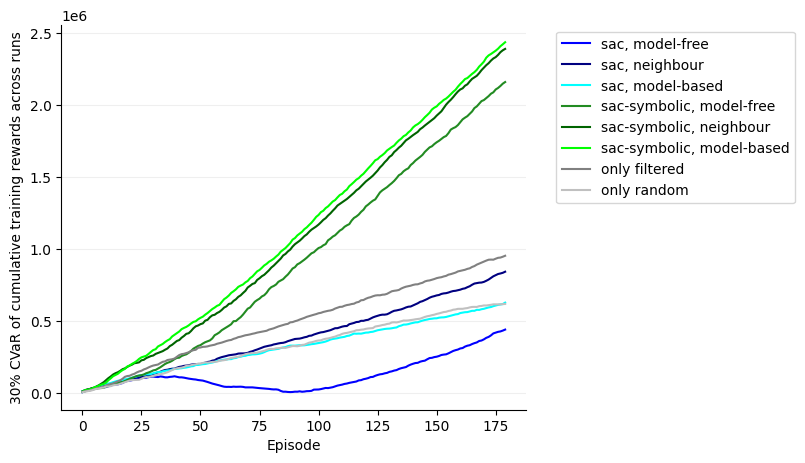

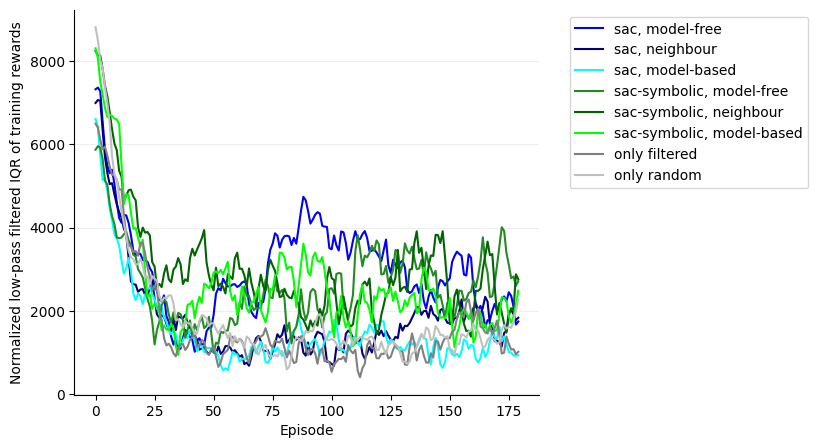

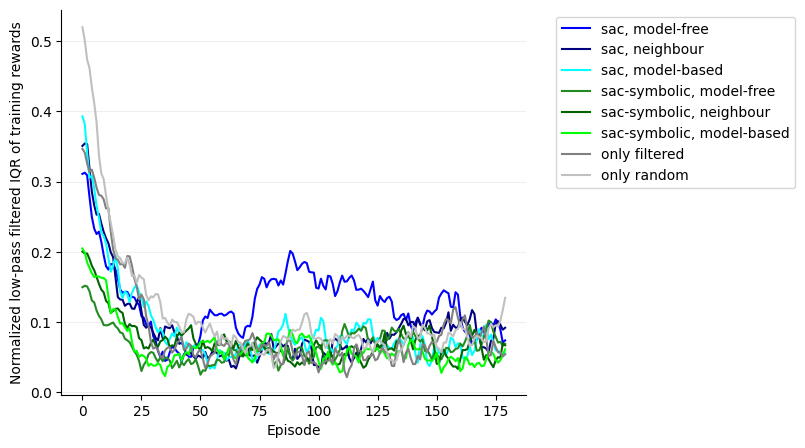

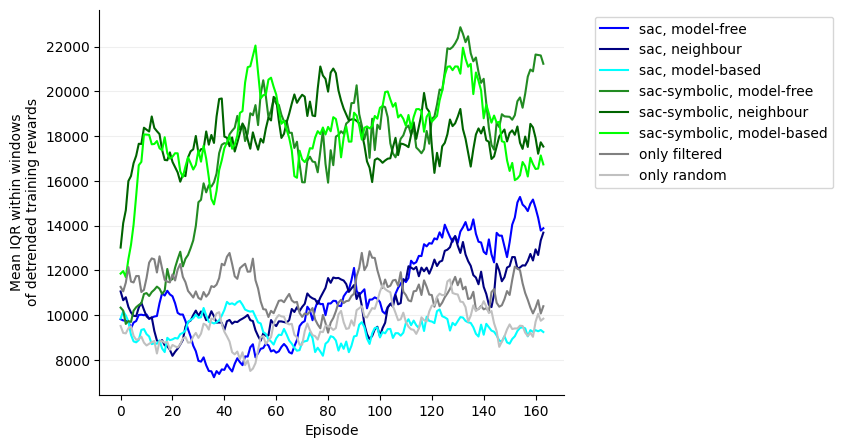

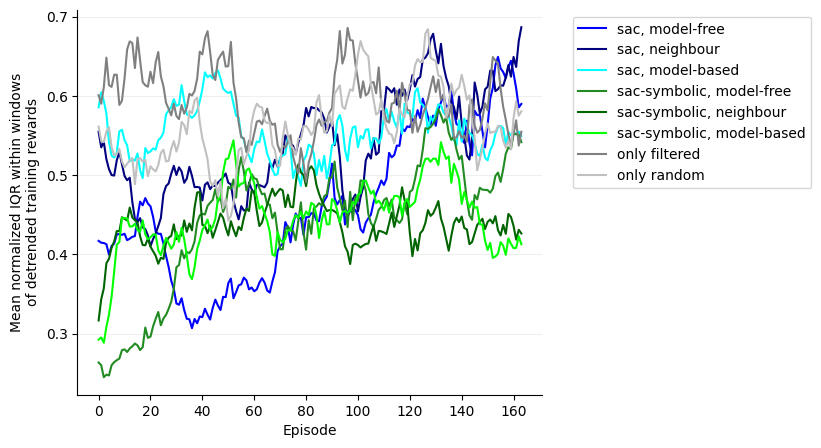

In [336]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import pickle
from functools import partial
omega_c = 0.01
T = 5

SEEDS = [101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120]
AGENT_TYPES = ["prioritized","sac","prioritized_symbolic","sac_symbolic"]
MBRL_KEYS = ["non-mbrl","mbrl","neighbour"]
GROUND_TYPES = [-1.0,0.0,1.0]
DRYWETS = [0.0,1.0]
data_type = "cumulative_training_rewards"

# mbrl_key = "non-mbrl"
# mbrl_key = "neighbour"
mbrl_key = "mbrl"

legend_dict = {
    "prioritized":"dqn",
    "sac":"sac",
    "prioritized_symbolic":"dqn-symbolic",
    "sac_symbolic":"sac-symbolic",
    "non-mbrl":"model-free",
    "neighbour":"neighbour",
    "mbrl":"model-based"
}

legend_dict_reverse = {
    "dqn":"prioritized",
    "sac":"sac",
    "dqn-symbolic":"prioritized_symbolic",
    "sac-symbolic":"sac_symbolic",
    "model-free":"non-mbrl",
    "neighbour":"neighbour",
    "model-based":"mbrl"
}

color_dict = {
    "dqn, model-free":"red",
    "sac, model-free":"blue",
    "dqn-symbolic, model-free":"yellow",
    "sac-symbolic, model-free":"forestgreen",
    "dqn, neighbour":"maroon",
    "sac, neighbour":"navy",
    "dqn-symbolic, neighbour":"darkgoldenrod",
    "sac-symbolic, neighbour":"darkgreen",
    "dqn, model-based":"magenta",
    "sac, model-based":"cyan",
    "dqn-symbolic, model-based":"darkorange",
    "sac-symbolic, model-based":"lime",
    "only filtered":"grey",
    "only random":"silver"
}


def generate_path_for_results(plot_tuple,ground_type, drywet, seed):
    if plot_tuple == "only filtered":
        path = f"experiments/evaluations/results/symbolic_only_filter_{ground_type}_{drywet}_{seed}.pickle"
        return path
    elif plot_tuple == "only random":
        path = f"experiments/evaluations/results/only_random_{ground_type}_{drywet}_{seed}.pickle"
        return path
    else:
        data_key_tuple = (legend_dict_reverse[plot_tuple.split(", ")[0]],legend_dict_reverse[plot_tuple.split(", ")[1]])
        path = f"experiments/evaluations/results/{data_key_tuple[0]}_{data_key_tuple[1]}_{ground_type}_{drywet}_{seed}.pickle"
        return path
    
# folder_name = "all_non-symbolic_nopt_baseline"
# agent_type = "sac"
# agent_type2 = "prioritized"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "all_symbolic_nopt_baseline"
# agent_type = "sac_symbolic"
# agent_type2 = "prioritized_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "dqn_all_nopt_baseline"
# agent_type = "prioritized"
# agent_type2 = "prioritized_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

folder_name = "sac_all_nopt_baseline"
agent_type = "sac"
agent_type2 = "sac_symbolic"
data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]



def plot_results(seeds, ground_type, drywet, data_key_tuples, window_length, folder_name = None):
    partial_calculate_iqr_across_time_window = partial(calculate_iqr_across_time_window, window_length=window_length)
    plot_tuples = [f"{legend_dict[dk_tuple[0]]}, {legend_dict[dk_tuple[1]]}" for dk_tuple in data_key_tuples]+["only filtered","only random"]
    results_dict = {}
    for plot_tuple in plot_tuples:
        results_dict[plot_tuple] = {}
        rewards_across_runs = np.empty((0,180))
        cumulative_rewards_across_runs = np.empty((0,180))
        diffs_during_runs = np.empty((0,179))
        q95_max = -np.inf
        for seed in seeds:
            path = generate_path_for_results(plot_tuple, ground_type, drywet, seed)
            with open(path,"rb") as f:
                result = pickle.load(f)
            rewards = result["training_rewards"]
            diff_rewards = np.diff(rewards)
            cumulative_rewards = result["cumulative_training_rewards"]
            rewards_across_runs = np.vstack((rewards_across_runs,rewards))
            cumulative_rewards_across_runs = np.vstack((cumulative_rewards_across_runs,cumulative_rewards))
            diffs_during_runs = np.vstack((diffs_during_runs,diff_rewards))
            q95 = np.quantile(rewards,0.95)
            if q95 > q95_max:
                q95_max = q95

        mean_rewards_across_runs = np.mean(rewards_across_runs,axis=0)
        mean_cumulative_rewards_across_runs = np.mean(cumulative_rewards_across_runs,axis=0)
        cumulative_rewards_last_entry = cumulative_rewards_across_runs[:,-1].flatten()
        cumulative_lower_30_quantile = np.quantile(cumulative_rewards_last_entry,0.3)
        lowest_30_percent_cumulative_rewards = cumulative_rewards_across_runs[cumulative_rewards_last_entry <= cumulative_lower_30_quantile]
        results_dict[plot_tuple]["mean_rewards"] = mean_rewards_across_runs
        results_dict[plot_tuple]["mean_cumulative_rewards"] = mean_cumulative_rewards_across_runs
        results_dict[plot_tuple]["cvar_cumulative_rewards"] = np.mean(lowest_30_percent_cumulative_rewards, axis=0)
        iqr_across_runs = calculate_lpf_iqr(rewards_across_runs, omega_c, T)
        results_dict[plot_tuple]["iqr_across_runs"] = iqr_across_runs
        results_dict[plot_tuple]["iqr_across_runs_normalized"] = iqr_across_runs/q95_max
        iqrs_during_runs = np.apply_along_axis(partial_calculate_iqr_across_time_window,axis=1,arr=diffs_during_runs)
        mean_iqrs_during_runs = np.mean(iqrs_during_runs,axis=0)
        results_dict[plot_tuple]["mean_iqrs_during_runs"] = mean_iqrs_during_runs
        results_dict[plot_tuple]["mean_iqrs_during_runs_normalized"] = mean_iqrs_during_runs/q95_max


    if folder_name is not None:
        general_path = f"plots/{folder_name}"
        if not os.path.exists(general_path):
            os.makedirs(general_path)

    def plot_results_by_key(key,ylabel):
        # Plot mean rewards
        plt.figure(figsize=(6,5))
        for plot_tuple in plot_tuples:
            plt.plot(results_dict[plot_tuple][key],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple])
        plt.grid(axis="y", alpha=0.2)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.xlabel("Episode")
        plt.ylabel(ylabel)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        if folder_name is not None:
            image_path = f"{general_path}/{key}.pdf"
            #save image without cropping off legend
            plt.savefig(image_path, bbox_inches='tight')
        plt.show()

    plot_results_by_key("mean_rewards","Mean training rewards across runs")
    plot_results_by_key("mean_cumulative_rewards","Mean cumulative training rewards across runs")
    plot_results_by_key("cvar_cumulative_rewards","30% CVaR of cumulative training rewards across runs")
    plot_results_by_key("iqr_across_runs","Normalized low-pass filtered IQR of training rewards")
    plot_results_by_key("iqr_across_runs_normalized","Normalized low-pass filtered IQR of training rewards")
    plot_results_by_key("mean_iqrs_during_runs","Mean IQR within windows of detrended training rewards")
    plot_results_by_key("mean_iqrs_during_runs_normalized","Mean normalized IQR within windows of detrended training rewards")

plot_results(SEEDS, ground_type = 0.0,drywet = 1.0, data_key_tuples = data_key_tuples, window_length = 15, folder_name = folder_name)

# Soil condition comparison

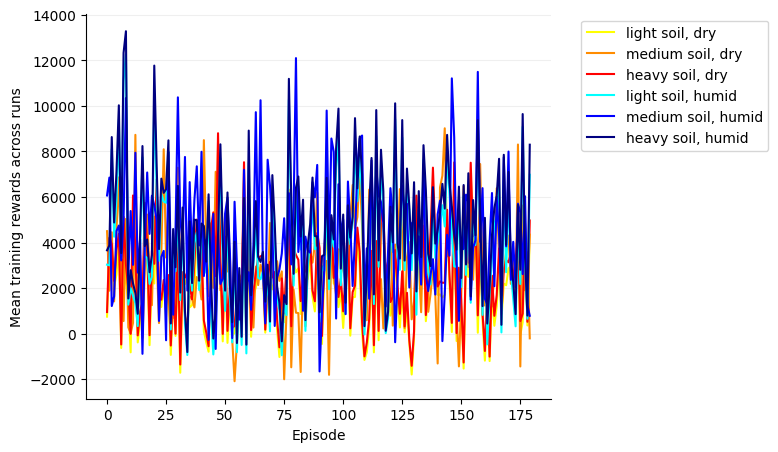

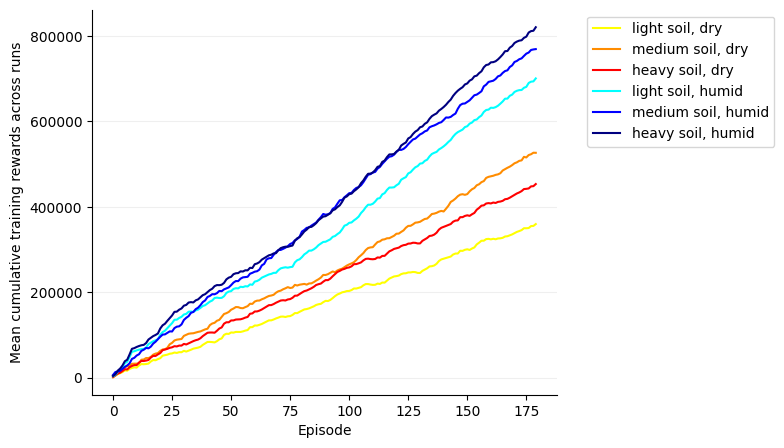

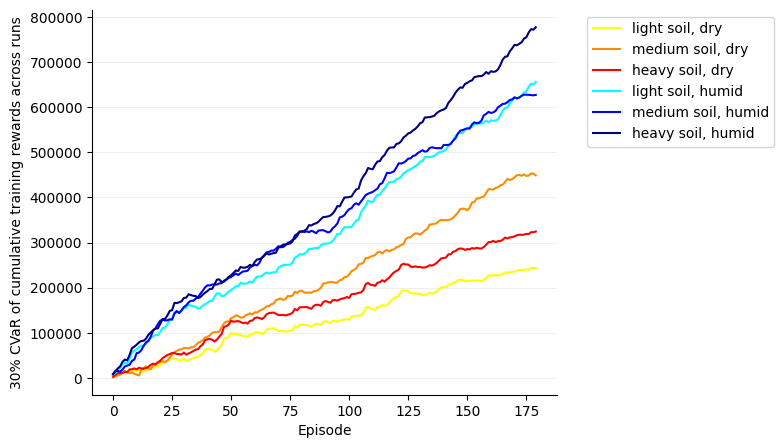

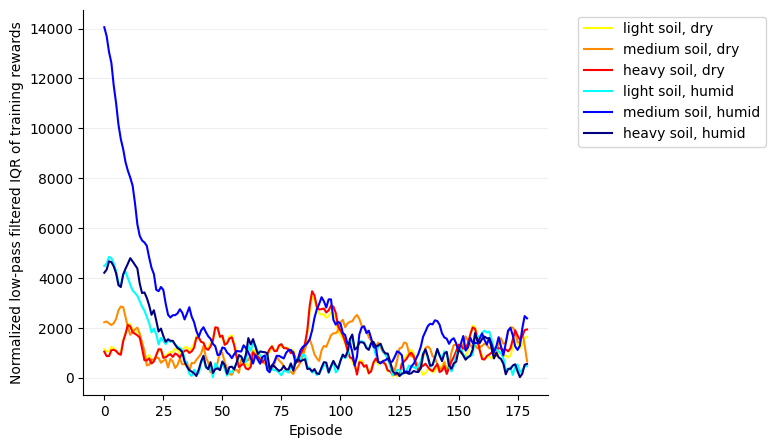

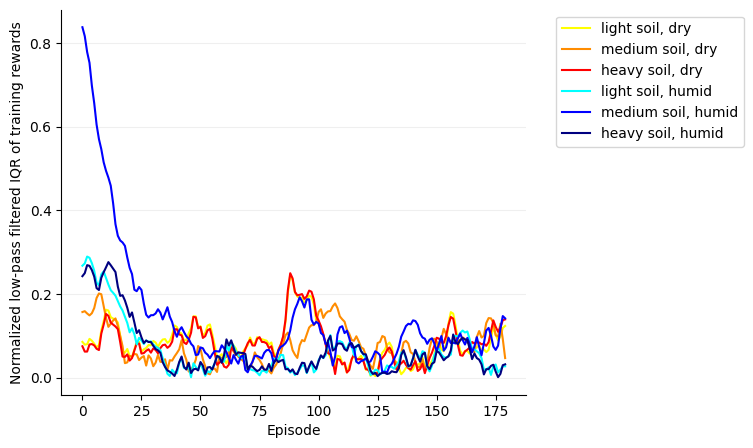

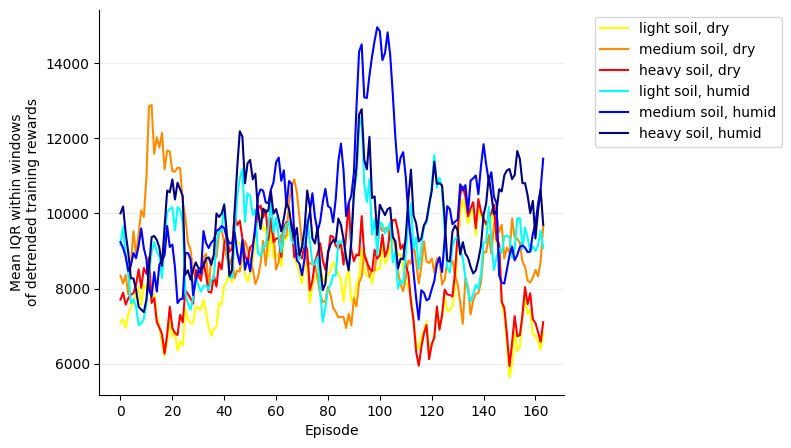

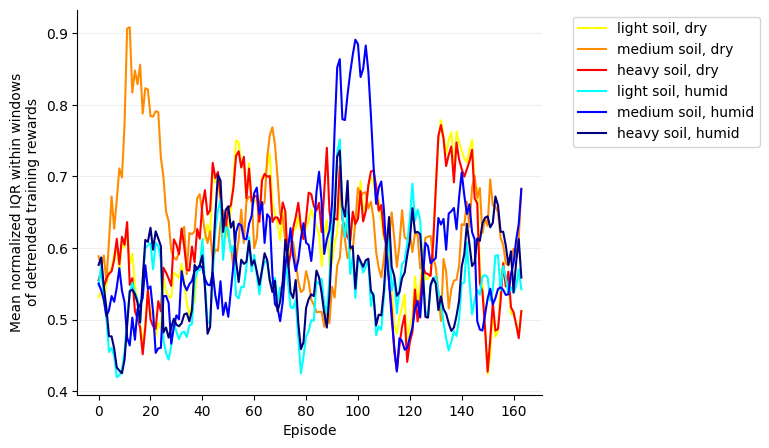

In [9]:
color_dict = {
    "light soil, humid":"cyan",
    "medium soil, humid":"blue",
    "heavy soil, humid":"navy",
    "light soil, dry":"yellow",
    "medium soil, dry":"darkorange",
    "heavy soil, dry":"red"
}

gt_dict = {
    -1.0:"light soil",
    0.0:"medium soil",
    1.0:"heavy soil"
}
drywet_dict = {
    0.0:"dry",
    1.0:"humid"
}

folder_name = "sac_symbolic_soil_conditions"
data_key_tuple = ("sac_symbolic","mbrl")
ground_types = [-1.0,0.0,1.0]
drywets = [0.0,1.0]

folder_name = "only_random_soil_conditions"
data_key_tuple = "only_random"
ground_types = [-1.0,0.0,1.0]
drywets = [0.0,1.0]

def plot_results_of_different_soil_conditions(seeds, ground_types, drywets, data_key_tuple, window_length, folder_name = None):
    partial_calculate_iqr_across_time_window = partial(calculate_iqr_across_time_window, window_length=window_length)
    results_dict = {}
    soil_dw_tuples = []
    for drywet in drywets:
        for ground_type in ground_types:
                soil_dw_tuple = f"{gt_dict[ground_type]}, {drywet_dict[drywet]}"
                soil_dw_tuples.append(soil_dw_tuple)
                results_dict[soil_dw_tuple] = {}
                rewards_across_runs = np.empty((0,180))
                cumulative_rewards_across_runs = np.empty((0,180))
                diffs_during_runs = np.empty((0,179))
                q95_max = -np.inf
                for seed in seeds:
                    if data_key_tuple == "only_random":
                        path = f"experiments/evaluations/results/only_random_{ground_type}_{drywet}_{seed}.pickle"
                    elif data_key_tuple == "only_filtered":
                        path = f"experiments/evaluations/results/symbolic_only_filter_{ground_type}_{drywet}_{seed}.pickle"
                    else:
                        path = f"experiments/evaluations/results/{data_key_tuple[0]}_{data_key_tuple[1]}_{ground_type}_{drywet}_{seed}.pickle"
                    with open(path,"rb") as f:
                        result = pickle.load(f)
                    rewards = result["training_rewards"]
                    diff_rewards = np.diff(rewards)
                    cumulative_rewards = result["cumulative_training_rewards"]
                    rewards_across_runs = np.vstack((rewards_across_runs,rewards))
                    cumulative_rewards_across_runs = np.vstack((cumulative_rewards_across_runs,cumulative_rewards))
                    diffs_during_runs = np.vstack((diffs_during_runs,diff_rewards))
                    q95 = np.quantile(rewards,0.95)
                    if q95 > q95_max:
                        q95_max = q95

                mean_rewards_across_runs = np.mean(rewards_across_runs,axis=0)
                mean_cumulative_rewards_across_runs = np.mean(cumulative_rewards_across_runs,axis=0)
                cumulative_rewards_last_entry = cumulative_rewards_across_runs[:,-1].flatten()
                cumulative_lower_30_quantile = np.quantile(cumulative_rewards_last_entry,0.3)
                lowest_30_percent_cumulative_rewards = cumulative_rewards_across_runs[cumulative_rewards_last_entry <= cumulative_lower_30_quantile]
                results_dict[soil_dw_tuple]["mean_rewards"] = mean_rewards_across_runs
                results_dict[soil_dw_tuple]["mean_cumulative_rewards"] = mean_cumulative_rewards_across_runs
                results_dict[soil_dw_tuple]["cvar_cumulative_rewards"] = np.mean(lowest_30_percent_cumulative_rewards, axis=0)
                iqr_across_runs = calculate_lpf_iqr(rewards_across_runs, omega_c, T)
                results_dict[soil_dw_tuple]["iqr_across_runs"] = iqr_across_runs
                results_dict[soil_dw_tuple]["iqr_across_runs_normalized"] = iqr_across_runs/q95_max
                iqrs_during_runs = np.apply_along_axis(partial_calculate_iqr_across_time_window,axis=1,arr=diffs_during_runs)
                mean_iqrs_during_runs = np.mean(iqrs_during_runs,axis=0)
                results_dict[soil_dw_tuple]["mean_iqrs_during_runs"] = mean_iqrs_during_runs
                results_dict[soil_dw_tuple]["mean_iqrs_during_runs_normalized"] = mean_iqrs_during_runs/q95_max


    if folder_name is not None:
        general_path = f"plots/{folder_name}"
        if not os.path.exists(general_path):
            os.makedirs(general_path)

    def plot_results_per_key(key, ylabel):
        # Plot mean rewards
        plt.figure(figsize=(6,5))
        for soil_dw_tuple in soil_dw_tuples:
            plt.plot(results_dict[soil_dw_tuple][key],label=soil_dw_tuple, alpha=1.0, color=color_dict[soil_dw_tuple])
        plt.grid(axis="y", alpha=0.2)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.xlabel("Episode")
        plt.ylabel(ylabel)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        if folder_name is not None:
            image_path = f"{general_path}/{key}.pdf"
            #save image without cropping off legend
            plt.savefig(image_path, bbox_inches='tight')
        plt.show()

    plot_results_per_key("mean_rewards", "Mean training rewards across runs")
    plot_results_per_key("mean_cumulative_rewards", "Mean cumulative training rewards across runs")
    plot_results_per_key("cvar_cumulative_rewards", "30% CVaR of cumulative training rewards across runs")
    plot_results_per_key("iqr_across_runs", "Normalized low-pass filtered IQR of training rewards")
    plot_results_per_key("iqr_across_runs_normalized", "Normalized low-pass filtered IQR of training rewards")
    plot_results_per_key("mean_iqrs_during_runs", "Mean IQR within windows\nof detrended training rewards")
    plot_results_per_key("mean_iqrs_during_runs_normalized", "Mean normalized IQR within windows\nof detrended training rewards")
    
plot_results_of_different_soil_conditions(SEEDS, ground_types = ground_types,drywets = drywets, data_key_tuple = data_key_tuple, window_length = 15, folder_name = folder_name)

# Pretraining comparison

dict_keys(['dqn-symbolic, model-free', 'dqn-symbolic, neighbour', 'dqn-symbolic, model-based'])
dict_keys(['only filtered', 'only random', 'dqn-symbolic, model-free', 'dqn-symbolic, neighbour', 'dqn-symbolic, model-based'])


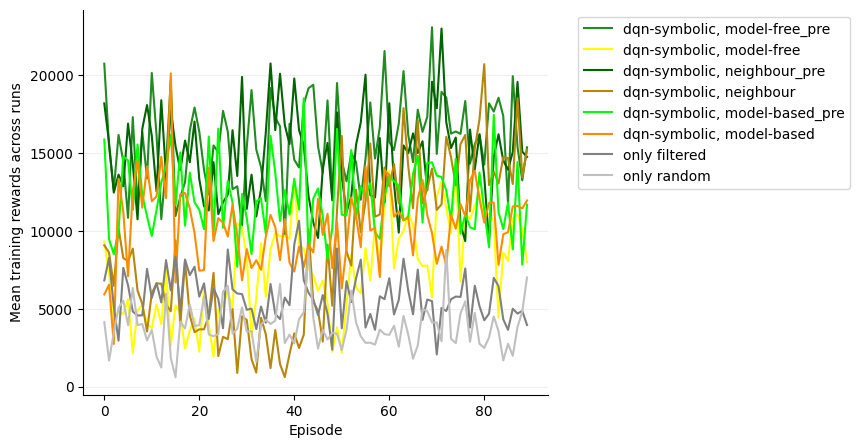

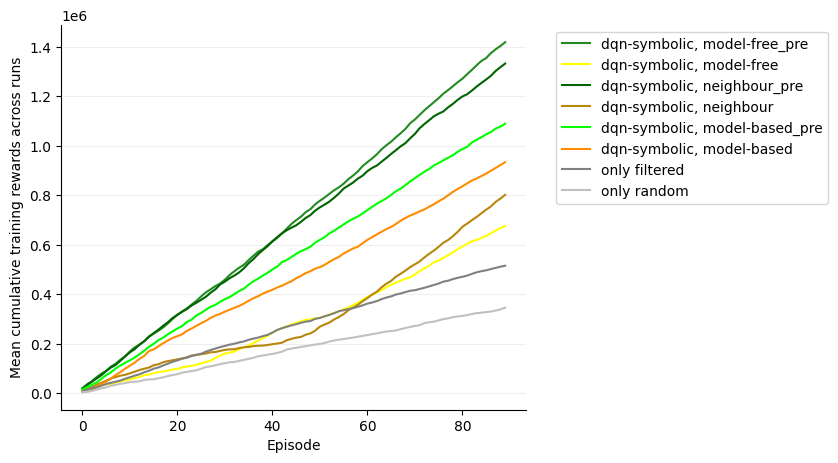

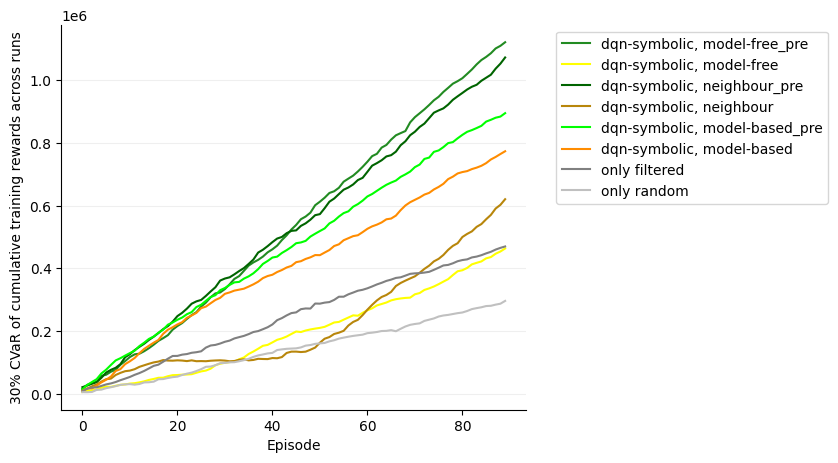

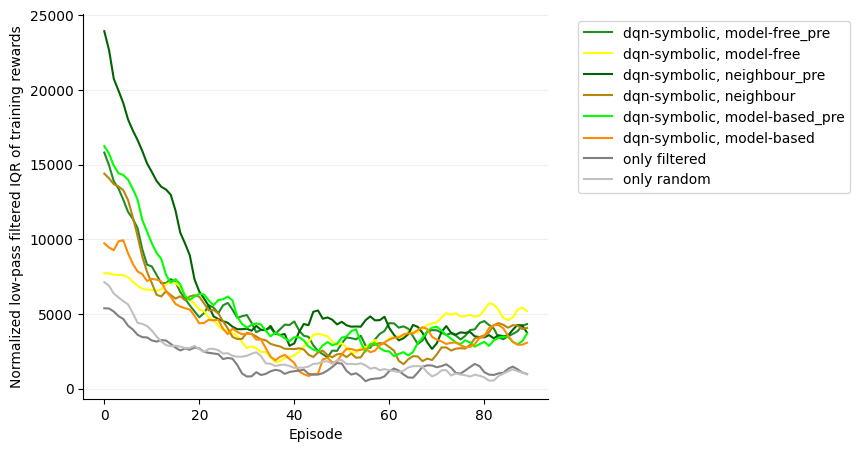

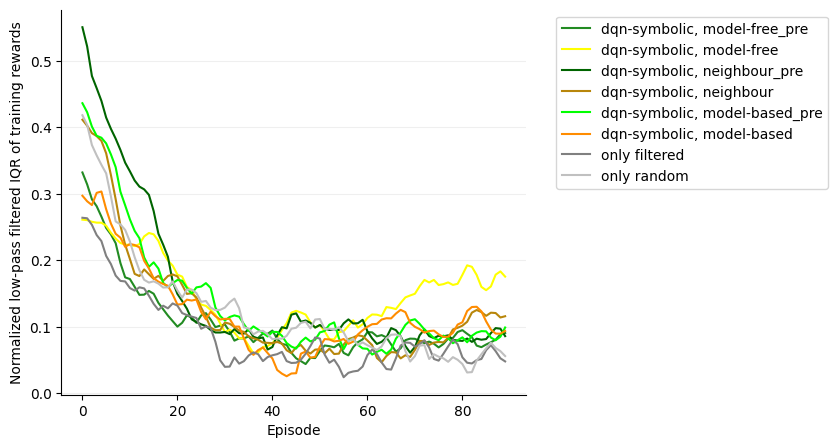

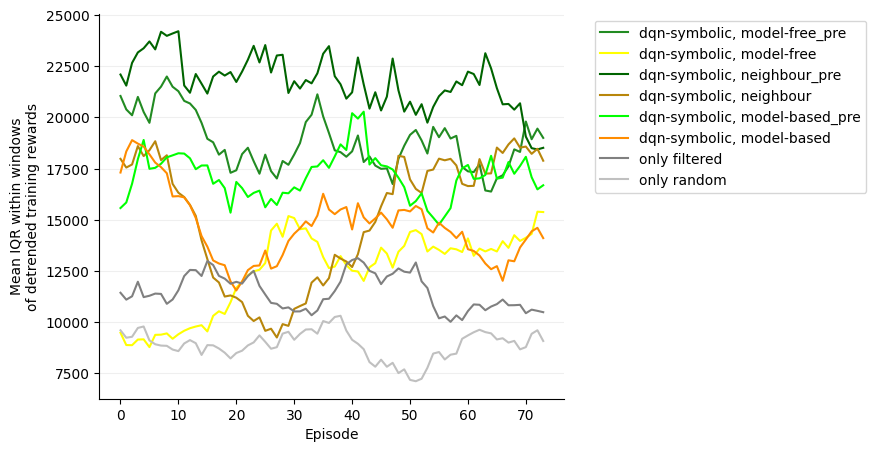

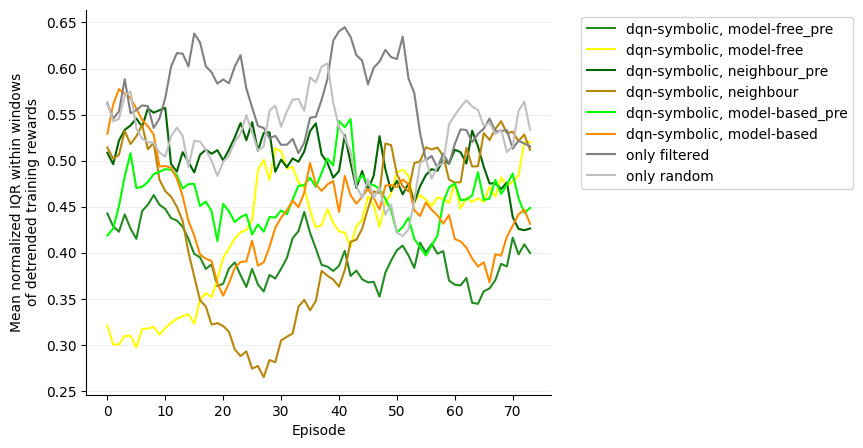

In [13]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import pickle
from functools import partial
omega_c = 0.01
T = 5

SEEDS = [101,102,103,104,105]
AGENT_TYPES = ["prioritized","sac","prioritized_symbolic","sac_symbolic"]
MBRL_KEYS = ["non-mbrl","mbrl","neighbour"]

legend_dict = {
    "prioritized":"dqn",
    "sac":"sac",
    "prioritized_symbolic":"dqn-symbolic",
    "sac_symbolic":"sac-symbolic",
    "non-mbrl":"model-free",
    "neighbour":"neighbour",
    "mbrl":"model-based"
}

legend_dict_reverse = {
    "dqn":"prioritized",
    "sac":"sac",
    "dqn-symbolic":"prioritized_symbolic",
    "sac-symbolic":"sac_symbolic",
    "model-free":"non-mbrl",
    "neighbour":"neighbour",
    "model-based":"mbrl"
}
color_dict = {
    "dqn, model-free":"red",
    "sac, model-free":"blue",
    "dqn-symbolic, model-free":"yellow",
    "sac-symbolic, model-free":"forestgreen",
    "dqn, neighbour":"maroon",
    "sac, neighbour":"navy",
    "dqn-symbolic, neighbour":"darkgoldenrod",
    "sac-symbolic, neighbour":"darkgreen",
    "dqn, model-based":"magenta",
    "sac, model-based":"cyan",
    "dqn-symbolic, model-based":"darkorange",
    "sac-symbolic, model-based":"lime",
    "only filtered":"grey",
    "only random":"silver"
}

color_dict_pretrained = {
    "pretrained":{
        "dqn, model-free":"blue",
        "sac, model-free":"blue",
        "dqn-symbolic, model-free":"forestgreen",
        "sac-symbolic, model-free":"forestgreen",
        "dqn, neighbour":"navy",
        "sac, neighbour":"navy",
        "dqn-symbolic, neighbour":"darkgreen",
        "sac-symbolic, neighbour":"darkgreen",
        "dqn, model-based":"cyan",
        "sac, model-based":"cyan",
        "dqn-symbolic, model-based":"lime",
        "sac-symbolic, model-based":"lime",
        "only filtered":"grey",
        "only random":"silver"
    },
    "base":{
        "dqn, model-free":"red",
        "sac, model-free":"red",
        "dqn-symbolic, model-free":"yellow",
        "sac-symbolic, model-free":"yellow",
        "dqn, neighbour":"maroon",
        "sac, neighbour":"maroon",
        "dqn-symbolic, neighbour":"darkgoldenrod",
        "sac-symbolic, neighbour":"darkgoldenrod",
        "dqn, model-based":"magenta",
        "sac, model-based":"magenta",
        "dqn-symbolic, model-based":"darkorange",
        "sac-symbolic, model-based":"darkorange",
        "only filtered":"grey",
        "only random":"silver"
    }

}


def generate_path_for_pretrained_results(plot_tuple, seed, test_seed):
    data_key_tuple = (legend_dict_reverse[plot_tuple.split(", ")[0]],legend_dict_reverse[plot_tuple.split(", ")[1]])
    path = f"experiments/evaluations/pretraining_results/{data_key_tuple[0]}_{data_key_tuple[1]}_{seed}_{test_seed}.pickle"
    return path
    
# folder_name = "all_non-symbolic_nopt_baseline"
# agent_type = "sac"
# agent_type2 = "prioritized"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "all_symbolic_nopt_baseline"
# agent_type = "sac_symbolic"
# agent_type2 = "prioritized_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "dqn_all_nopt_baseline"
# agent_type = "prioritized"
# agent_type2 = "prioritized_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

folder_name = "dqn_symbolic_compare-pt_baseline"
agent_type = "prioritized_symbolic"
data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl")]



def plot_pretrained_results(seeds, data_key_tuples, window_length, folder_name = None, compare_flag = "pretrained"):
    ground_type = 0.0
    drywet = 1.0
    if compare_flag == "only_pretrained" or compare_flag == "both":
        n_episodes = 90
    else:
        n_episodes = 180
    partial_calculate_iqr_across_time_window = partial(calculate_iqr_across_time_window, window_length=window_length)
    plot_tuples = [f"{legend_dict[dk_tuple[0]]}, {legend_dict[dk_tuple[1]]}" for dk_tuple in data_key_tuples]+["only filtered","only random"]
    results_dict = {
        "pretrained":{},
        "base":{}
    }
    if compare_flag == "both":
        keys = ["pretrained","base"]
    else:
        keys = ["pretrained"]
    for intended_key in keys:
        for plot_tuple in plot_tuples:
            if intended_key == "pretrained":
                if plot_tuple in ["only filtered","only random"]:
                    key = "base"
                else:
                    key = "pretrained"
            else:
                if plot_tuple in ["only filtered","only random"]:
                    continue
                else:
                    key = "base"

            results_dict[key][plot_tuple] = {}
            rewards_across_runs = np.empty((0,n_episodes))
            cumulative_rewards_across_runs = np.empty((0,n_episodes))
            diffs_during_runs = np.empty((0,n_episodes-1))
            q95_max = -np.inf
            for seed in seeds:
                test_seeds = [seed+5,seed+10,seed+15]
                for test_seed in test_seeds:
                    if key == "base":
                        path = generate_path_for_results(plot_tuple, ground_type, drywet, test_seed)
                    else:
                        path = generate_path_for_pretrained_results(plot_tuple, seed, test_seed)
                    with open(path,"rb") as f:
                        result = pickle.load(f)
                    rewards = result["training_rewards"][:n_episodes]
                    diff_rewards = np.diff(rewards)
                    cumulative_rewards = result["cumulative_training_rewards"][:n_episodes]
                    rewards_across_runs = np.vstack((rewards_across_runs,rewards))
                    cumulative_rewards_across_runs = np.vstack((cumulative_rewards_across_runs,cumulative_rewards))
                    diffs_during_runs = np.vstack((diffs_during_runs,diff_rewards))
                    q95 = np.quantile(rewards,0.95)
                    if q95 > q95_max:
                        q95_max = q95
            mean_rewards_across_runs = np.mean(rewards_across_runs,axis=0)
            mean_cumulative_rewards_across_runs = np.mean(cumulative_rewards_across_runs,axis=0)
            cumulative_rewards_last_entry = cumulative_rewards_across_runs[:,-1].flatten()
            cumulative_lower_30_quantile = np.quantile(cumulative_rewards_last_entry,0.3)
            lowest_30_percent_cumulative_rewards = cumulative_rewards_across_runs[cumulative_rewards_last_entry <= cumulative_lower_30_quantile]
            results_dict[key][plot_tuple]["mean_rewards"] = mean_rewards_across_runs
            results_dict[key][plot_tuple]["mean_cumulative_rewards"] = mean_cumulative_rewards_across_runs
            results_dict[key][plot_tuple]["cvar_cumulative_rewards"] = np.mean(lowest_30_percent_cumulative_rewards, axis=0)
            iqr_across_runs = calculate_lpf_iqr(rewards_across_runs, omega_c, T)
            results_dict[key][plot_tuple]["iqr_across_runs"] = iqr_across_runs
            results_dict[key][plot_tuple]["iqr_across_runs_normalized"] = iqr_across_runs/q95_max
            iqrs_during_runs = np.apply_along_axis(partial_calculate_iqr_across_time_window,axis=1,arr=diffs_during_runs)
            mean_iqrs_during_runs = np.mean(iqrs_during_runs,axis=0)
            results_dict[key][plot_tuple]["mean_iqrs_during_runs"] = mean_iqrs_during_runs
            results_dict[key][plot_tuple]["mean_iqrs_during_runs_normalized"] = mean_iqrs_during_runs/q95_max           
            

    print(results_dict["pretrained"].keys())
    print(results_dict["base"].keys())
    if folder_name is not None:
        general_path = f"plots/{folder_name}"
        if not os.path.exists(general_path):
            os.makedirs(general_path)

    def plot_results_per_key(key,ylabel):
        # Plot mean rewards
        plt.figure(figsize=(6,5))
        for plot_tuple in plot_tuples:
            if compare_flag == "both":
                if plot_tuple not in ["only filtered","only random"]:
                    plt.plot(results_dict["pretrained"][plot_tuple][key],label=plot_tuple+"_pre", alpha=1.0, color=color_dict_pretrained["pretrained"][plot_tuple])
                
                plt.plot(results_dict["base"][plot_tuple][key],label=plot_tuple, alpha=1.0, color=color_dict_pretrained["base"][plot_tuple])
            else:
                if plot_tuple not in ["only filtered","only random"]:
                    plt.plot(results_dict["pretrained"][plot_tuple][key],label=plot_tuple+"_pre", alpha=1.0, color=color_dict[plot_tuple])
                else:
                    plt.plot(results_dict["base"][plot_tuple][key],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple])    
        plt.grid(axis="y", alpha=0.2)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.xlabel("Episode")
        plt.ylabel(ylabel)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        if folder_name is not None:
            image_path = f"{general_path}/{key}.pdf"
            #save image without cropping off legend
            plt.savefig(image_path, bbox_inches='tight')
        plt.show()

    key = "mean_rewards"
    ylabel = "Mean training rewards across runs"
    plot_results_per_key(key,ylabel)

    key = "mean_cumulative_rewards"
    ylabel = "Mean cumulative training rewards across runs"
    plot_results_per_key(key,ylabel)

    key = "cvar_cumulative_rewards"
    ylabel = "30% CVaR of cumulative training rewards across runs"
    plot_results_per_key(key,ylabel)

    key = "iqr_across_runs"
    ylabel = "Normalized low-pass filtered IQR of training rewards"
    plot_results_per_key(key,ylabel)

    key = "iqr_across_runs_normalized"
    ylabel = "Normalized low-pass filtered IQR of training rewards"
    plot_results_per_key(key,ylabel)

    key = "mean_iqrs_during_runs"
    ylabel = "Mean IQR within windows\nof detrended training rewards"
    plot_results_per_key(key,ylabel)

    key = "mean_iqrs_during_runs_normalized"
    ylabel = "Mean normalized IQR within windows\nof detrended training rewards"
    plot_results_per_key(key,ylabel)

plot_pretrained_results(SEEDS, data_key_tuples = data_key_tuples, window_length = 15, folder_name = folder_name, compare_flag = "both")

# 1000ep plots

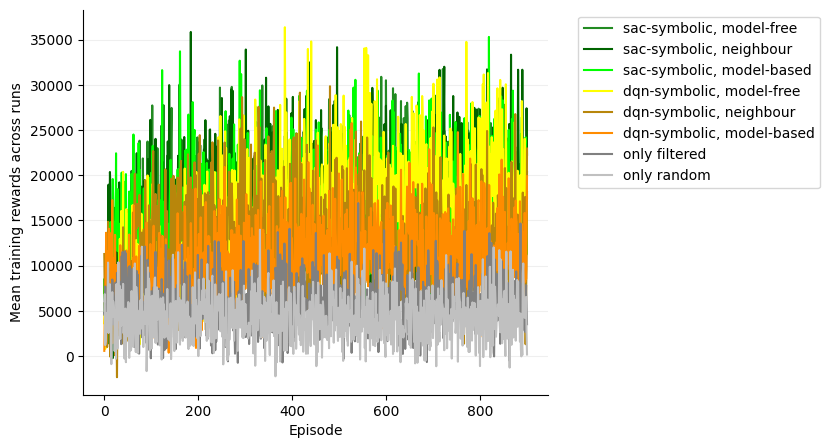

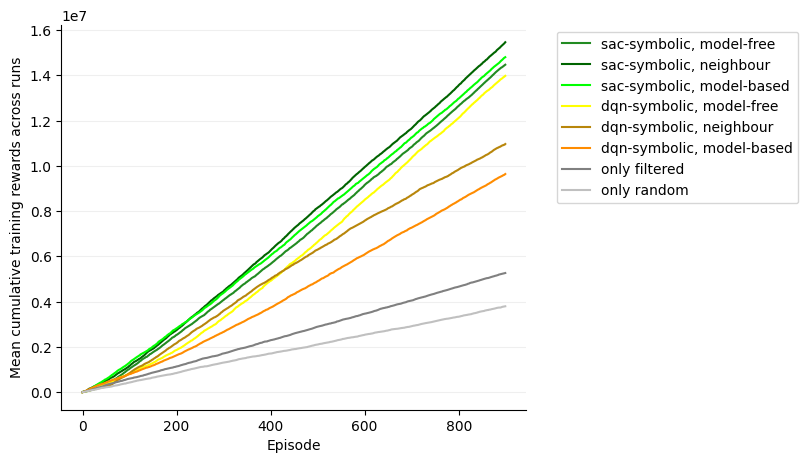

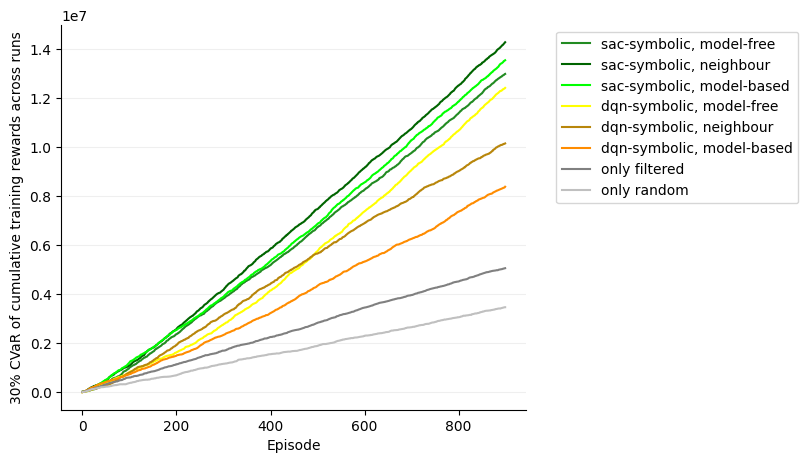

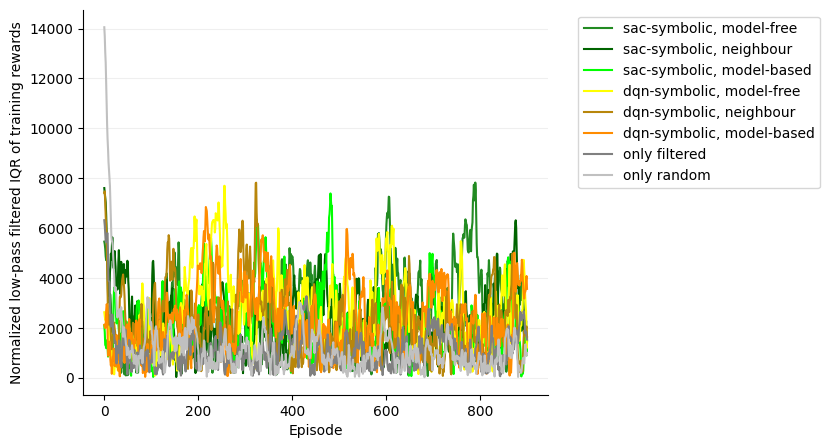

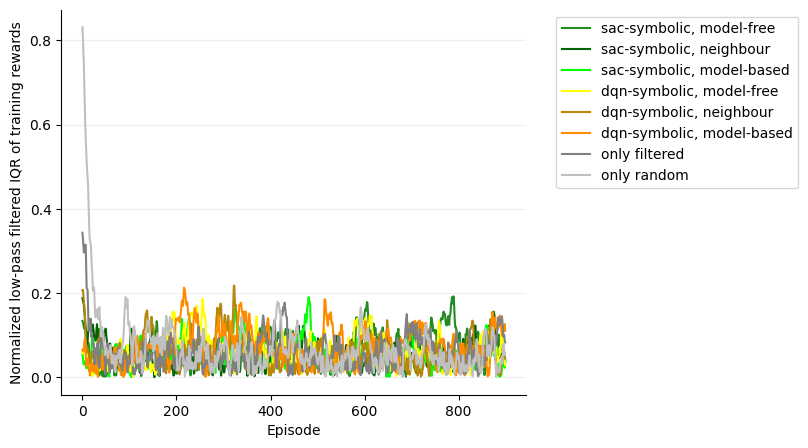

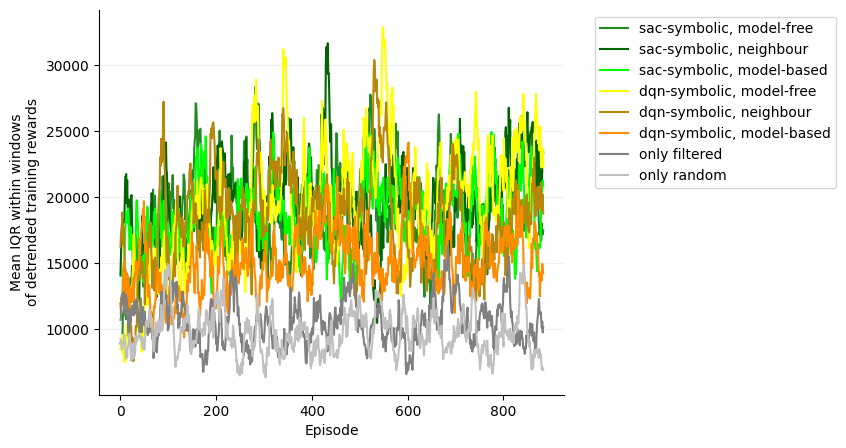

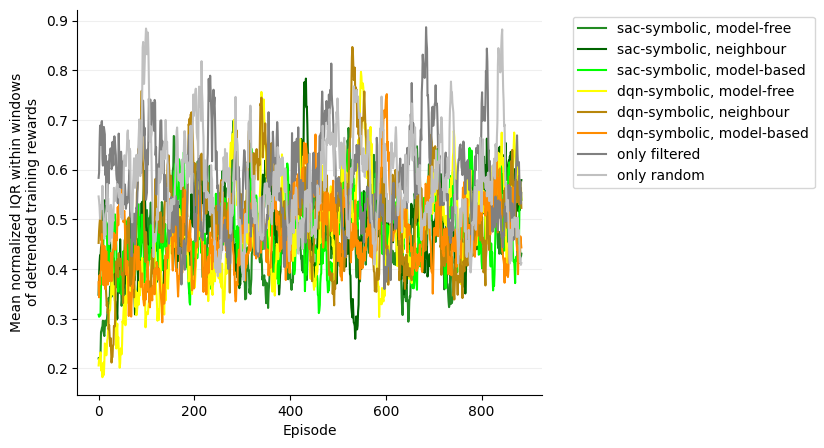

In [11]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import pickle
from functools import partial
omega_c = 0.01
T = 5

SEEDS = [101,102,103,104,105]
AGENT_TYPES = ["prioritized","sac","prioritized_symbolic","sac_symbolic"]
MBRL_KEYS = ["non-mbrl","mbrl","neighbour"]
GROUND_TYPES = [-1.0,0.0,1.0]
DRYWETS = [0.0,1.0]
data_type = "cumulative_training_rewards"

# mbrl_key = "non-mbrl"
# mbrl_key = "neighbour"
mbrl_key = "mbrl"

legend_dict = {
    "prioritized":"dqn",
    "sac":"sac",
    "prioritized_symbolic":"dqn-symbolic",
    "sac_symbolic":"sac-symbolic",
    "non-mbrl":"model-free",
    "neighbour":"neighbour",
    "mbrl":"model-based"
}

legend_dict_reverse = {
    "dqn":"prioritized",
    "sac":"sac",
    "dqn-symbolic":"prioritized_symbolic",
    "sac-symbolic":"sac_symbolic",
    "model-free":"non-mbrl",
    "neighbour":"neighbour",
    "model-based":"mbrl"
}

color_dict = {
    "dqn, model-free":"red",
    "sac, model-free":"blue",
    "dqn-symbolic, model-free":"yellow",
    "sac-symbolic, model-free":"forestgreen",
    "dqn, neighbour":"maroon",
    "sac, neighbour":"navy",
    "dqn-symbolic, neighbour":"darkgoldenrod",
    "sac-symbolic, neighbour":"darkgreen",
    "dqn, model-based":"magenta",
    "sac, model-based":"cyan",
    "dqn-symbolic, model-based":"darkorange",
    "sac-symbolic, model-based":"lime",
    "only filtered":"grey",
    "only random":"silver"
}


def generate_path_for_results_1000(plot_tuple,ground_type, drywet, seed):
    if plot_tuple == "only filtered":
        path = f"experiments/evaluations/results/symbolic_only_filter_{ground_type}_{drywet}_{seed}_1000ep.pickle"
        return path
    elif plot_tuple == "only random":
        path = f"experiments/evaluations/results/only_random_{ground_type}_{drywet}_{seed}_1000ep.pickle"
        return path
    else:
        data_key_tuple = (legend_dict_reverse[plot_tuple.split(", ")[0]],legend_dict_reverse[plot_tuple.split(", ")[1]])
        path = f"experiments/evaluations/results/{data_key_tuple[0]}_{data_key_tuple[1]}_{ground_type}_{drywet}_{seed}_1000ep.pickle"
        return path
    
# folder_name = "all_non-symbolic_nopt_baseline"
# agent_type = "sac"
# agent_type2 = "prioritized"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

folder_name = "all_symbolic_nopt_baseline_1000"
agent_type = "sac_symbolic"
agent_type2 = "prioritized_symbolic"
data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "dqn_all_nopt_baseline_1000"
# agent_type = "prioritized"
# agent_type2 = "prioritized_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "sac_all_nopt_baseline_1000"
# agent_type = "sac"
# agent_type2 = "sac_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]



def plot_results_1000(seeds, data_key_tuples, window_length, folder_name = None):
    ground_type = 0.0
    drywet = 1.0
    partial_calculate_iqr_across_time_window = partial(calculate_iqr_across_time_window, window_length=window_length)
    plot_tuples = [f"{legend_dict[dk_tuple[0]]}, {legend_dict[dk_tuple[1]]}" for dk_tuple in data_key_tuples]+["only filtered","only random"]
    results_dict = {}
    for plot_tuple in plot_tuples:
        results_dict[plot_tuple] = {}
        rewards_across_runs = np.empty((0,900))
        cumulative_rewards_across_runs = np.empty((0,900))
        diffs_during_runs = np.empty((0,899))
        q95_max = -np.inf
        for seed in seeds:
            path = generate_path_for_results_1000(plot_tuple, ground_type, drywet, seed)
            with open(path,"rb") as f:
                result = pickle.load(f)
            rewards = result["training_rewards"]
            diff_rewards = np.diff(rewards)
            cumulative_rewards = result["cumulative_training_rewards"]
            rewards_across_runs = np.vstack((rewards_across_runs,rewards))
            cumulative_rewards_across_runs = np.vstack((cumulative_rewards_across_runs,cumulative_rewards))
            diffs_during_runs = np.vstack((diffs_during_runs,diff_rewards))
            q95 = np.quantile(rewards,0.95)
            if q95 > q95_max:
                q95_max = q95

        mean_rewards_across_runs = np.mean(rewards_across_runs,axis=0)
        mean_cumulative_rewards_across_runs = np.mean(cumulative_rewards_across_runs,axis=0)
        cumulative_rewards_last_entry = cumulative_rewards_across_runs[:,-1].flatten()
        cumulative_lower_30_quantile = np.quantile(cumulative_rewards_last_entry,0.3)
        lowest_30_percent_cumulative_rewards = cumulative_rewards_across_runs[cumulative_rewards_last_entry <= cumulative_lower_30_quantile]
        results_dict[plot_tuple]["mean_rewards"] = mean_rewards_across_runs
        results_dict[plot_tuple]["mean_cumulative_rewards"] = mean_cumulative_rewards_across_runs
        results_dict[plot_tuple]["cvar_cumulative_rewards"] = np.mean(lowest_30_percent_cumulative_rewards, axis=0)
        iqr_across_runs = calculate_lpf_iqr(rewards_across_runs, omega_c, T)
        results_dict[plot_tuple]["iqr_across_runs"] = iqr_across_runs
        results_dict[plot_tuple]["iqr_across_runs_normalized"] = iqr_across_runs/q95_max
        iqrs_during_runs = np.apply_along_axis(partial_calculate_iqr_across_time_window,axis=1,arr=diffs_during_runs)
        mean_iqrs_during_runs = np.mean(iqrs_during_runs,axis=0)
        results_dict[plot_tuple]["mean_iqrs_during_runs"] = mean_iqrs_during_runs
        results_dict[plot_tuple]["mean_iqrs_during_runs_normalized"] = mean_iqrs_during_runs/q95_max


    if folder_name is not None:
        general_path = f"plots/{folder_name}"
        if not os.path.exists(general_path):
            os.makedirs(general_path)


    def plot_results_per_key(key,ylabel):
        plt.figure(figsize=(6,5))
        for plot_tuple in plot_tuples:
            plt.plot(results_dict[plot_tuple][key],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple])
        plt.grid(axis="y", alpha=0.2)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.xlabel("Episode")
        plt.ylabel(ylabel)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        if folder_name is not None:
            image_path = f"{general_path}/{key}.pdf"
            #save image without cropping off legend
            plt.savefig(image_path, bbox_inches='tight')
        plt.show()

    key = "mean_rewards"
    ylabel = "Mean training rewards across runs"
    plot_results_per_key(key,ylabel)

    key = "mean_cumulative_rewards"
    ylabel = "Mean cumulative training rewards across runs"
    plot_results_per_key(key,ylabel)

    key = "cvar_cumulative_rewards"
    ylabel = "30% CVaR of cumulative training rewards across runs"
    plot_results_per_key(key,ylabel)

    key = "iqr_across_runs"
    ylabel = "Normalized low-pass filtered IQR of training rewards"
    plot_results_per_key(key,ylabel)

    key = "iqr_across_runs_normalized"
    ylabel = "Normalized low-pass filtered IQR of training rewards"
    plot_results_per_key(key,ylabel)

    key = "mean_iqrs_during_runs"
    ylabel = "Mean IQR within windows\nof detrended training rewards"
    plot_results_per_key(key,ylabel)

    key = "mean_iqrs_during_runs_normalized"
    ylabel = "Mean normalized IQR within windows\nof detrended training rewards"
    plot_results_per_key(key,ylabel)

plot_results_1000(SEEDS, data_key_tuples = data_key_tuples, window_length = 15, folder_name = folder_name)

# Calculating bootstrap confidence intervals for all metrics

## Helpers

In [80]:
from scipy import stats
def calculate_lpf_raw(raw_data, omega_c, T):
    lpf_partial = partial(lpf, omega_c=omega_c, T=T)
    data_lpf = np.apply_along_axis(lpf_partial,1,raw_data)
    return data_lpf

def calculate_IQR_across_runs_from_LPF(raw_lpf_data):
    upper_quartile = np.quantile(raw_lpf_data,0.75,axis=0)
    lower_quartile = np.quantile(raw_lpf_data,0.25,axis=0)
    iqr = upper_quartile - lower_quartile
    return iqr

def permutation_test_mean(means1, means2, n_permutations):
    assert len(means1) == len(means2)
    n = len(means1)
    mean_diff = np.mean(means1) - np.mean(means2)
    all_means = np.concatenate((means1,means2))
    num_greater = 0
    for i in range(n_permutations):
        all_means_permuted = random.permutation(all_means)
        mean_diff_permuted = np.mean(all_means_permuted[:n]) - np.mean(all_means_permuted[n:])
        if mean_diff_permuted > mean_diff:
            num_greater += 1
    return num_greater/n_permutations

def permutation_test_normalized_iqrs(lpf_rewards1, lpf_rewards2, q95s1, q95s2, n_permutations):
    normalized_iqr_across_runs1 = calculate_IQR_across_runs_from_LPF(lpf_rewards1)/(q95s1.max())
    normalized_iqr_across_runs2 = calculate_IQR_across_runs_from_LPF(lpf_rewards2)/(q95s2.max())
    n = lpf_rewards1.shape[0]
    mean_diff = np.mean(normalized_iqr_across_runs1) - np.mean(normalized_iqr_across_runs2)
    concatenated_lpf_rewards = np.concatenate((lpf_rewards1,lpf_rewards2),axis=0)
    concatenated_q95s = np.concatenate((q95s1,q95s2))
    combined_length = concatenated_lpf_rewards.shape[0]
    unpermuted_idxs = np.arange(combined_length)
    num_greater = 0
    for i in range(n_permutations):
        permuted_idxs = random.permutation(unpermuted_idxs)
        permuted_lpf_rewards = concatenated_lpf_rewards[permuted_idxs]
        permuted_q95s = concatenated_q95s[permuted_idxs]
        permuted_lpf_rewards1 = calculate_IQR_across_runs_from_LPF(permuted_lpf_rewards[:n])
        permuted_lpf_rewards2 = calculate_IQR_across_runs_from_LPF(permuted_lpf_rewards[n:])
        normalized_permuted_lpf_rewards1 = permuted_lpf_rewards1/(permuted_q95s[:n].max())
        normalized_permuted_lpf_rewards2 = permuted_lpf_rewards2/(permuted_q95s[n:].max())
        mean_diff_permuted = np.mean(normalized_permuted_lpf_rewards1) - np.mean(normalized_permuted_lpf_rewards2)
        if mean_diff_permuted > mean_diff:
            num_greater += 1
    return num_greater/n_permutations

def calculate_entropy(crops_selected_idxs_list):
    crops_selected_idxs_array = np.array(flatten_comprehension(crops_selected_idxs_list))
    unique, counts = np.unique(crops_selected_idxs_array, return_counts=True)
    counts = counts/counts.sum()
    entropy = stats.entropy(counts)
    return entropy

def flatten_comprehension(matrix):
    return [item for row in matrix for item in row]

## Bootstrapped Standard results

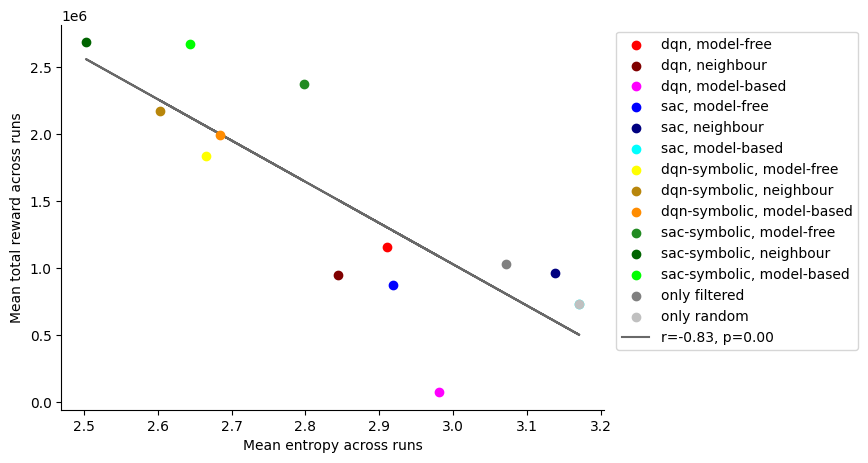

In [98]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import pickle
from functools import partial
from numpy import random
random.seed(42)
from tqdm import tqdm
import seaborn as sns
import pickle
import os
from scipy import stats


omega_c = 0.01
T = 5

SEEDS = [101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120]
AGENT_TYPES = ["prioritized","sac","prioritized_symbolic","sac_symbolic"]
MBRL_KEYS = ["non-mbrl","mbrl","neighbour"]
GROUND_TYPES = [-1.0,0.0,1.0]
DRYWETS = [0.0,1.0]
data_type = "cumulative_training_rewards"

# mbrl_key = "non-mbrl"
# mbrl_key = "neighbour"
mbrl_key = "mbrl"

legend_dict = {
    "prioritized":"dqn",
    "sac":"sac",
    "prioritized_symbolic":"dqn-symbolic",
    "sac_symbolic":"sac-symbolic",
    "non-mbrl":"model-free",
    "neighbour":"neighbour",
    "mbrl":"model-based"
}

legend_dict_reverse = {
    "dqn":"prioritized",
    "sac":"sac",
    "dqn-symbolic":"prioritized_symbolic",
    "sac-symbolic":"sac_symbolic",
    "model-free":"non-mbrl",
    "neighbour":"neighbour",
    "model-based":"mbrl"
}

color_dict = {
    "dqn, model-free":"red",
    "sac, model-free":"blue",
    "dqn-symbolic, model-free":"yellow",
    "sac-symbolic, model-free":"forestgreen",
    "dqn, neighbour":"maroon",
    "sac, neighbour":"navy",
    "dqn-symbolic, neighbour":"darkgoldenrod",
    "sac-symbolic, neighbour":"darkgreen",
    "dqn, model-based":"magenta",
    "sac, model-based":"cyan",
    "dqn-symbolic, model-based":"darkorange",
    "sac-symbolic, model-based":"lime",
    "only filtered":"grey",
    "only random":"silver"
}


def generate_path_for_results(plot_tuple,ground_type, drywet, seed):
    if plot_tuple == "only filtered":
        path = f"experiments/evaluations/results/symbolic_only_filter_{ground_type}_{drywet}_{seed}.pickle"
        return path
    elif plot_tuple == "only random":
        path = f"experiments/evaluations/results/only_random_{ground_type}_{drywet}_{seed}.pickle"
        return path
    else:
        data_key_tuple = (legend_dict_reverse[plot_tuple.split(", ")[0]],legend_dict_reverse[plot_tuple.split(", ")[1]])
        path = f"experiments/evaluations/results/{data_key_tuple[0]}_{data_key_tuple[1]}_{ground_type}_{drywet}_{seed}.pickle"
        return path
    
# folder_name = "all_non-symbolic_nopt_baseline"
# agent_type = "sac"
# agent_type2 = "prioritized"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "all_symbolic_nopt_baseline"
# agent_type = "sac_symbolic"
# agent_type2 = "prioritized_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "dqn_all_nopt_baseline"
# agent_type = "prioritized"
# agent_type2 = "prioritized_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "sac_all_nopt_baseline"
# agent_type = "sac"
# agent_type2 = "sac_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

folder_name = "all_all_nopt_baseline"
agent_type = "prioritized"
agent_type2 = "sac"
agent_type3 = "prioritized_symbolic"
agent_type4 = "sac_symbolic"

data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl"),(agent_type3,"non-mbrl"),(agent_type3,"neighbour"),(agent_type3,"mbrl"),(agent_type4,"non-mbrl"),(agent_type4,"neighbour"),(agent_type4,"mbrl")]




def plot_bootstrapped_results(seeds, ground_type, drywet, data_key_tuples, window_length, folder_name = None, n_bootstrap = 10, overwrite = False):
    result_path = "plots/statistical_tests/results"
    n_runs = 20
    bootstrap_idxs_list = []
    for i in range(n_bootstrap):
        bootstrap_idxs_list.append(random.choice(range(n_runs),n_runs, replace=True))
    partial_calculate_iqr_across_time_window = partial(calculate_iqr_across_time_window, window_length=window_length)
    plot_tuples = [f"{legend_dict[dk_tuple[0]]}, {legend_dict[dk_tuple[1]]}" for dk_tuple in data_key_tuples]+["only filtered","only random"]
    intermediate_data_dict = {}
    results_dict = {}
    bootstrap_results_dict = {}
    for plot_tuple in plot_tuples:
        # check if path  already exists
        current_path = result_path+f"/{plot_tuple}_{n_bootstrap}.pickle"
        # check if file exists under the path
        if os.path.exists(current_path):
            with open(current_path,"rb") as f:
                bootstrap_results_dict[plot_tuple] = pickle.load(f)
        if overwrite or not os.path.exists(current_path):   
            intermediate_data_dict[plot_tuple] = {}
            results_dict[plot_tuple] = {}
            bootstrap_results_dict[plot_tuple] = {}
            rewards_across_runs = np.empty((0,180))
            cumulative_rewards_across_runs = np.empty((0,180))
            diffs_during_runs = np.empty((0,179))
            entropy_across_runs = []
            for seed in seeds:
                path = generate_path_for_results(plot_tuple, ground_type, drywet, seed)
                with open(path,"rb") as f:
                    result = pickle.load(f)
                rewards = result["training_rewards"]
                diff_rewards = np.diff(rewards)
                cumulative_rewards = result["cumulative_training_rewards"]
                rewards_across_runs = np.vstack((rewards_across_runs,rewards))
                cumulative_rewards_across_runs = np.vstack((cumulative_rewards_across_runs,cumulative_rewards))
                diffs_during_runs = np.vstack((diffs_during_runs,diff_rewards))
                entropy_across_runs.append(calculate_entropy(result["crops_selected_idxs_list"]))

            intermediate_data_dict[plot_tuple]["mean_rewards_across_runs_first20"]=np.mean(rewards_across_runs[:,:20],axis=1)
            intermediate_data_dict[plot_tuple]["mean_rewards_across_runs_last30"]=np.mean(rewards_across_runs[:,-30:],axis=1)
            intermediate_data_dict[plot_tuple]["q95_rewards_across_runs"] = np.quantile(rewards_across_runs,0.95,axis=1)
            intermediate_data_dict[plot_tuple]["total_reward_across_runs"]=cumulative_rewards_across_runs[:,-1]
            intermediate_data_dict[plot_tuple]["lpf_rewards_across_runs"]=calculate_lpf_raw(rewards_across_runs, omega_c, T)
            iqrs_during_runs = np.apply_along_axis(partial_calculate_iqr_across_time_window,axis=1,arr=diffs_during_runs)
            intermediate_data_dict[plot_tuple]["mean_iqrs_during_runs_first20"]=np.mean(iqrs_during_runs[:,:20],axis=1)
            intermediate_data_dict[plot_tuple]["mean_iqrs_during_runs_last30"]=np.mean(iqrs_during_runs[:,-30:],axis=1)
            intermediate_data_dict[plot_tuple]["entropy_across_runs"]=np.array(entropy_across_runs)

            bootstrap_results_dict[plot_tuple]["mean_rewards_across_runs_first20"] = []
            bootstrap_results_dict[plot_tuple]["mean_rewards_across_runs_last30"] = []
            bootstrap_results_dict[plot_tuple]["mean_total_reward_across_runs"] = []
            bootstrap_results_dict[plot_tuple]["mean_iqrs_across_runs_first20"] = []
            bootstrap_results_dict[plot_tuple]["mean_iqrs_across_runs_last30"] = []
            bootstrap_results_dict[plot_tuple]["mean_iqrs_across_runs_first20_norm"] = []
            bootstrap_results_dict[plot_tuple]["mean_iqrs_across_runs_last30_norm"] = []
            bootstrap_results_dict[plot_tuple]["mean_iqrs_during_runs_first20"] = []
            bootstrap_results_dict[plot_tuple]["mean_iqrs_during_runs_last30"] = []
            bootstrap_results_dict[plot_tuple]["mean_iqrs_during_runs_first20_norm"] = []
            bootstrap_results_dict[plot_tuple]["mean_iqrs_during_runs_last30_norm"] = []
            bootstrap_results_dict[plot_tuple]["mean_entropy_across_runs"] = []
            for bootstrap_idxs in tqdm(bootstrap_idxs_list):
                bootstrap_results_dict[plot_tuple]["mean_rewards_across_runs_first20"].append(np.mean(intermediate_data_dict[plot_tuple]["mean_rewards_across_runs_first20"][bootstrap_idxs]))
                bootstrap_results_dict[plot_tuple]["mean_rewards_across_runs_last30"].append(np.mean(intermediate_data_dict[plot_tuple]["mean_rewards_across_runs_last30"][bootstrap_idxs]))
                bootstrap_results_dict[plot_tuple]["mean_total_reward_across_runs"].append(np.mean(intermediate_data_dict[plot_tuple]["total_reward_across_runs"][bootstrap_idxs]))

                # calculate q95 from rewards across runs
                q95_max_bootstrapped = intermediate_data_dict[plot_tuple]["q95_rewards_across_runs"][bootstrap_idxs].max()

                # IQR across runs calculation from LPF raw data
                lpf_rewards_across_runs_bootstrapped = intermediate_data_dict[plot_tuple]["lpf_rewards_across_runs"][bootstrap_idxs]
                iqr_across_runs_bootstrapped = calculate_IQR_across_runs_from_LPF(lpf_rewards_across_runs_bootstrapped)
                mean_iqr_across_runs_bootstrapped_first20 = np.mean(iqr_across_runs_bootstrapped[:20])
                mean_iqr_across_runs_bootstrapped_last30 = np.mean(iqr_across_runs_bootstrapped[-30:])
                bootstrap_results_dict[plot_tuple]["mean_iqrs_across_runs_first20"].append(mean_iqr_across_runs_bootstrapped_first20)
                bootstrap_results_dict[plot_tuple]["mean_iqrs_across_runs_last30"].append(mean_iqr_across_runs_bootstrapped_last30)
                bootstrap_results_dict[plot_tuple]["mean_iqrs_across_runs_first20_norm"].append(mean_iqr_across_runs_bootstrapped_first20/q95_max_bootstrapped)
                bootstrap_results_dict[plot_tuple]["mean_iqrs_across_runs_last30_norm"].append(mean_iqr_across_runs_bootstrapped_last30/q95_max_bootstrapped)

                # IQR during runs calculation
                mean_iqrs_during_runs_bootstrapped_first20 = np.mean(intermediate_data_dict[plot_tuple]["mean_iqrs_during_runs_first20"][bootstrap_idxs])
                mean_iqrs_during_runs_bootstrapped_last30 = np.mean(intermediate_data_dict[plot_tuple]["mean_iqrs_during_runs_last30"][bootstrap_idxs])
                bootstrap_results_dict[plot_tuple]["mean_iqrs_during_runs_first20"].append(mean_iqrs_during_runs_bootstrapped_first20)
                bootstrap_results_dict[plot_tuple]["mean_iqrs_during_runs_last30"].append(mean_iqrs_during_runs_bootstrapped_last30)
                bootstrap_results_dict[plot_tuple]["mean_iqrs_during_runs_first20_norm"].append(mean_iqrs_during_runs_bootstrapped_first20/q95_max_bootstrapped)
                bootstrap_results_dict[plot_tuple]["mean_iqrs_during_runs_last30_norm"].append(mean_iqrs_during_runs_bootstrapped_last30/q95_max_bootstrapped)

                bootstrap_results_dict[plot_tuple]["mean_entropy_across_runs"].append(np.mean(intermediate_data_dict[plot_tuple]["entropy_across_runs"][bootstrap_idxs]))

            with open(current_path,"wb") as f:
                pickle.dump(bootstrap_results_dict[plot_tuple],f)


    if folder_name is not None:
        general_path = f"plots/statistical_tests/vis/{folder_name}"
        if not os.path.exists(general_path):
            os.makedirs(general_path)

    
    def plot_bootstrap_results_by_key(key, xlabel):
        # Mean first 20 training rewards
        plt.figure(figsize = (14,7))
        sorted_plot_tuples = []
        for plot_tuple in plot_tuples:
            a = np.array(bootstrap_results_dict[plot_tuple][key])
            tmp_mean = np.mean(a)
            tmp_std = np.std(a)
            sorted_plot_tuples.append((tmp_mean,plot_tuple))
        sorted_plot_tuples = sorted(sorted_plot_tuples, reverse = True)   
        for _, plot_tuple in sorted_plot_tuples:
            a = np.array(bootstrap_results_dict[plot_tuple][key])
            plt.hist(a, bins=50, alpha=0.5, color=color_dict[plot_tuple], density=True, rwidth = 0.8)
            # Plot the percentiles
            # ci_lower, ci_upper = np.percentile(a, [2.5, 97.5])
            # plt.axvline(ci_lower, color=color_dict[plot_tuple], alpha = 0.7, linestyle='dotted', linewidth=1.0)
            # plt.axvline(ci_upper, color=color_dict[plot_tuple], alpha = 0.7, linestyle='dashed', linewidth=1.0)
        for _, plot_tuple in sorted_plot_tuples:
            a = np.array(bootstrap_results_dict[plot_tuple][key])
            sns.kdeplot(a, color=color_dict[plot_tuple], alpha=1.0, label = plot_tuple)
        plt.xlabel(xlabel)
        plt.ylabel("density")
        plt.legend()
        if folder_name is not None:
            image_path = f"{general_path}/{key}.pdf"
            plt.savefig(image_path, bbox_inches='tight')
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.show()

    def plot_two_bootstrap_means_against_each_other(key1, key2, label1, label2):
        # Mean first 20 training rewards
        plt.figure(figsize = (7,5))
        plot_results = {}
        for plot_tuple in plot_tuples:
            a = np.array(bootstrap_results_dict[plot_tuple][key1])
            b = np.array(bootstrap_results_dict[plot_tuple][key2])
            mean1 = np.mean(a)
            mean2 = np.mean(b)
            plot_results[plot_tuple] = (mean1,mean2)

        # create plot with mean1 on x-axis and mean2 on y-axis
        for plot_tuple in plot_tuples:
            plt.scatter(plot_results[plot_tuple][0],plot_results[plot_tuple][1], color=color_dict[plot_tuple], alpha=1.0, label = plot_tuple, zorder=2)
        # plot linear regression line
        x = np.array([plot_results[plot_tuple][0] for plot_tuple in plot_tuples])
        y = np.array([plot_results[plot_tuple][1] for plot_tuple in plot_tuples])
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        plt.plot(x, intercept + slope*x, color="dimgrey", alpha=1.0, label = f"r={r_value:.2f}, p={p_value:.2f}", zorder=1)

        plt.xlabel(label1)
        plt.ylabel(label2)
        # add legend to the right of the plot
        plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
        if folder_name is not None:
            image_path = f"{general_path}/scatter_{key1}_{key2}.pdf"
            plt.savefig(image_path, bbox_inches='tight')
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.show()


    # key = "mean_rewards_across_runs_first20"
    # xlabel = "Mean first 20 training reward across runs"
    # plot_bootstrap_results_by_key(key, xlabel)

    # key = "mean_rewards_across_runs_last30"
    # xlabel = "Mean last 30 training reward across runs"
    # plot_bootstrap_results_by_key(key, xlabel)

    # key = "mean_total_reward_across_runs"
    # xlabel = "Mean total reward across runs"
    # plot_bootstrap_results_by_key(key, xlabel)

    # key = "mean_iqrs_across_runs_first20_norm"
    # xlabel = "Mean normalized IQRs of first 20 episodes across runs"
    # plot_bootstrap_results_by_key(key, xlabel)

    # key = "mean_iqrs_across_runs_last30_norm"
    # xlabel = "Mean normalized IQRs of last 30 episodes across runs"
    # plot_bootstrap_results_by_key(key, xlabel)

    # key = "mean_iqrs_during_runs_first20_norm"
    # xlabel = "Mean normalized IQRs of first 20 episodes within runs"
    # plot_bootstrap_results_by_key(key, xlabel)

    # key = "mean_iqrs_during_runs_last30_norm"
    # xlabel = "Mean normalized IQRs of last 30 episodes within runs"
    # plot_bootstrap_results_by_key(key, xlabel)

    # key = "mean_entropy_across_runs"
    # xlabel = "Mean entropy across runs"
    # plot_bootstrap_results_by_key(key, xlabel)

    key2 = "mean_total_reward_across_runs"
    key1 = "mean_entropy_across_runs"
    label2 = "Mean total reward across runs"
    label1 = "Mean entropy across runs"
    plot_two_bootstrap_means_against_each_other(key1, key2, label1, label2)


plot_bootstrapped_results(SEEDS, ground_type = 0.0,drywet = 1.0, data_key_tuples = data_key_tuples, window_length = 15, folder_name = folder_name, n_bootstrap = 50000, overwrite = False)

## Bootstrap Pretraining results

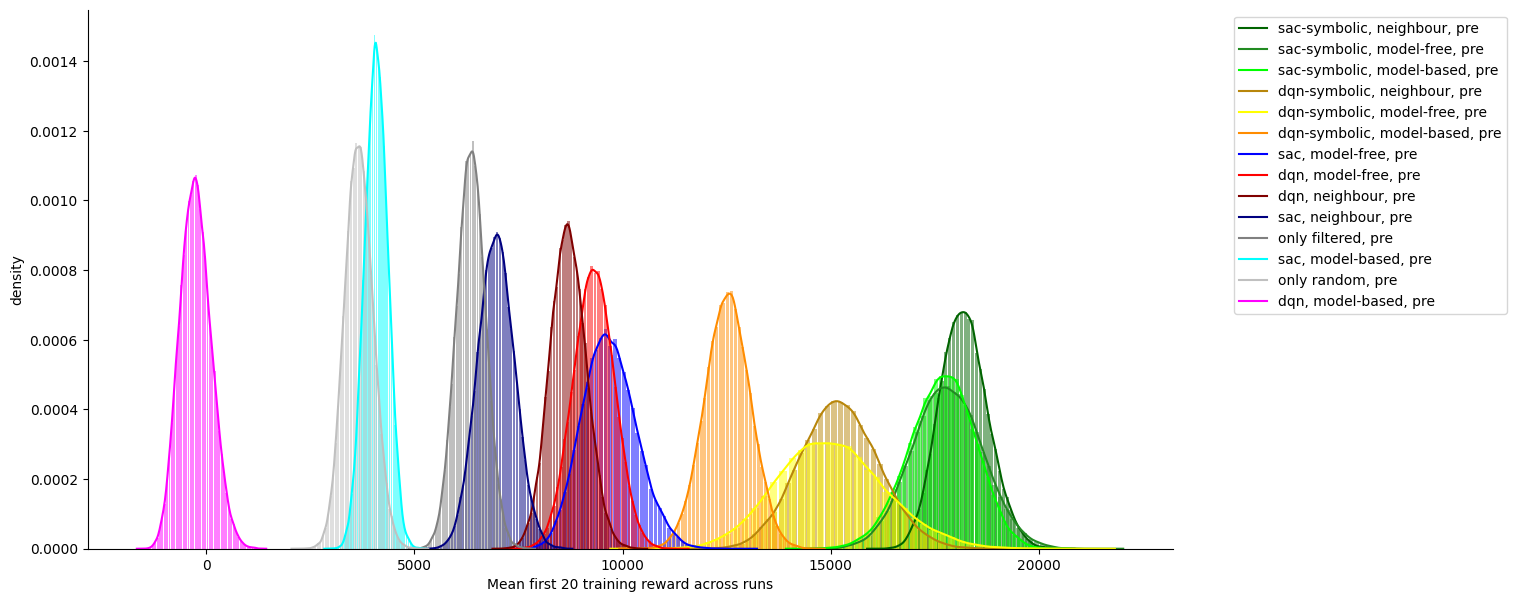

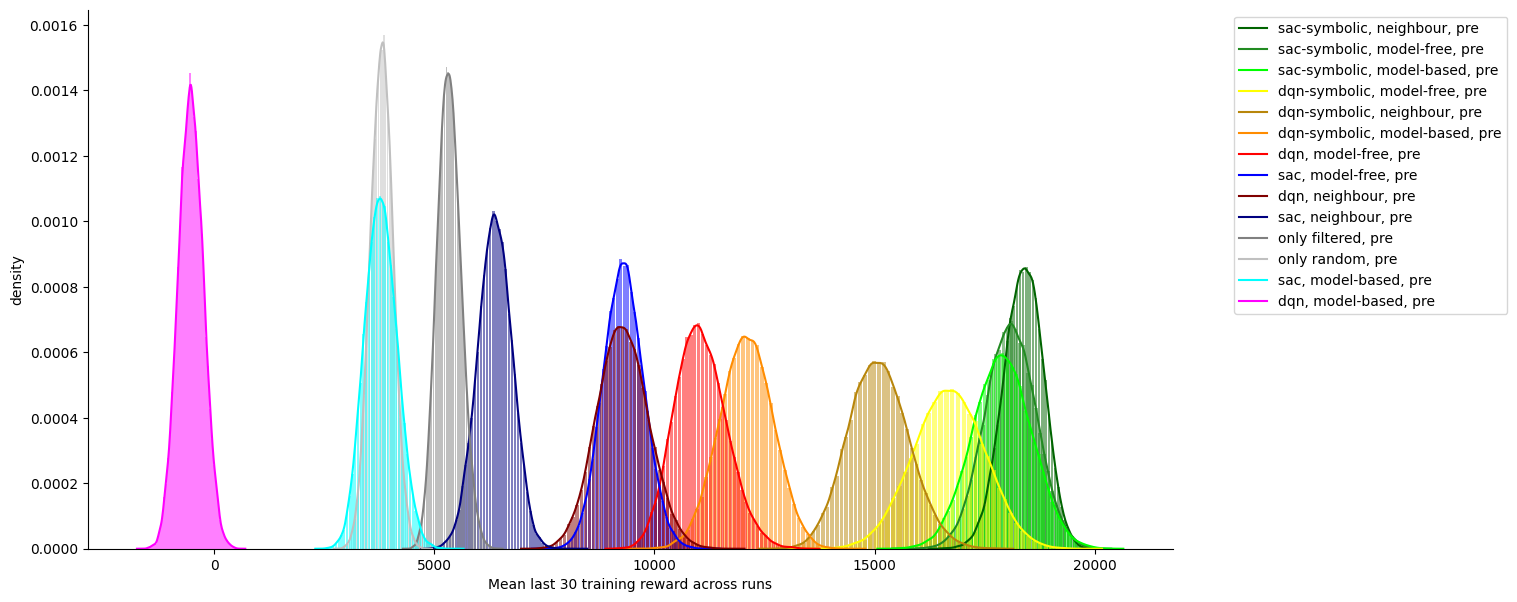

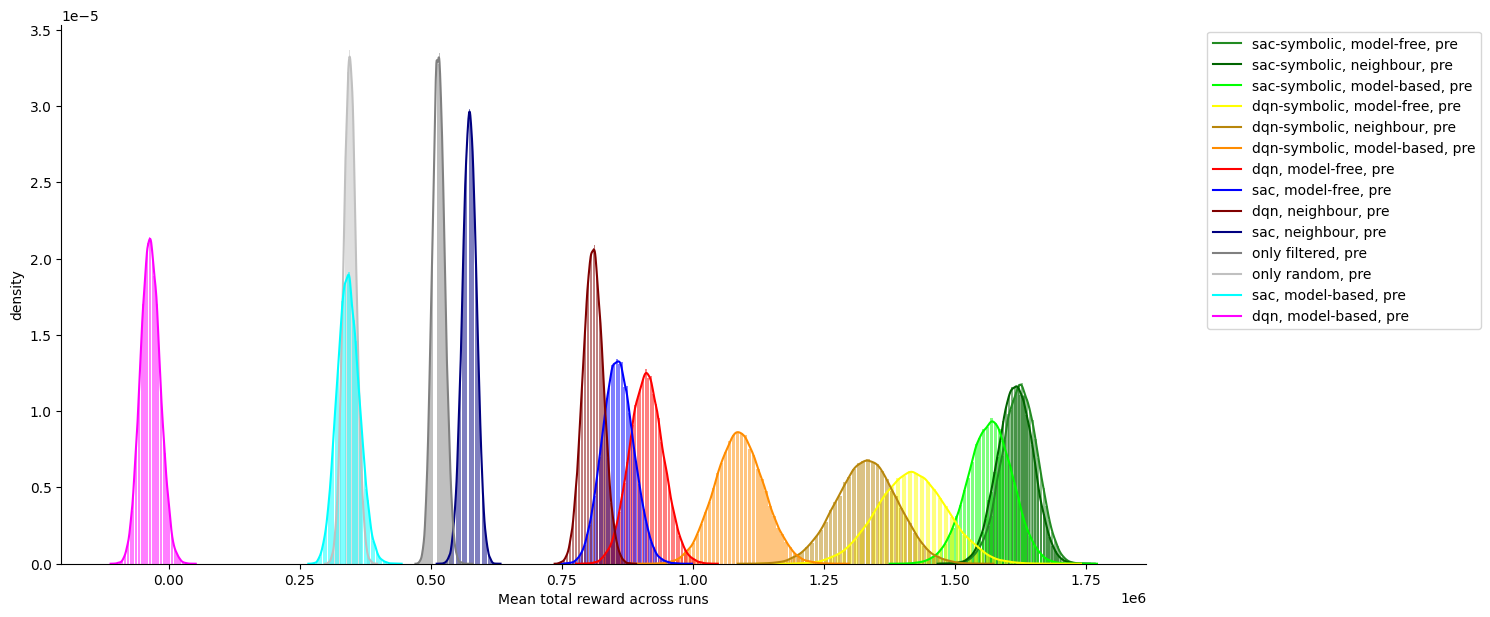

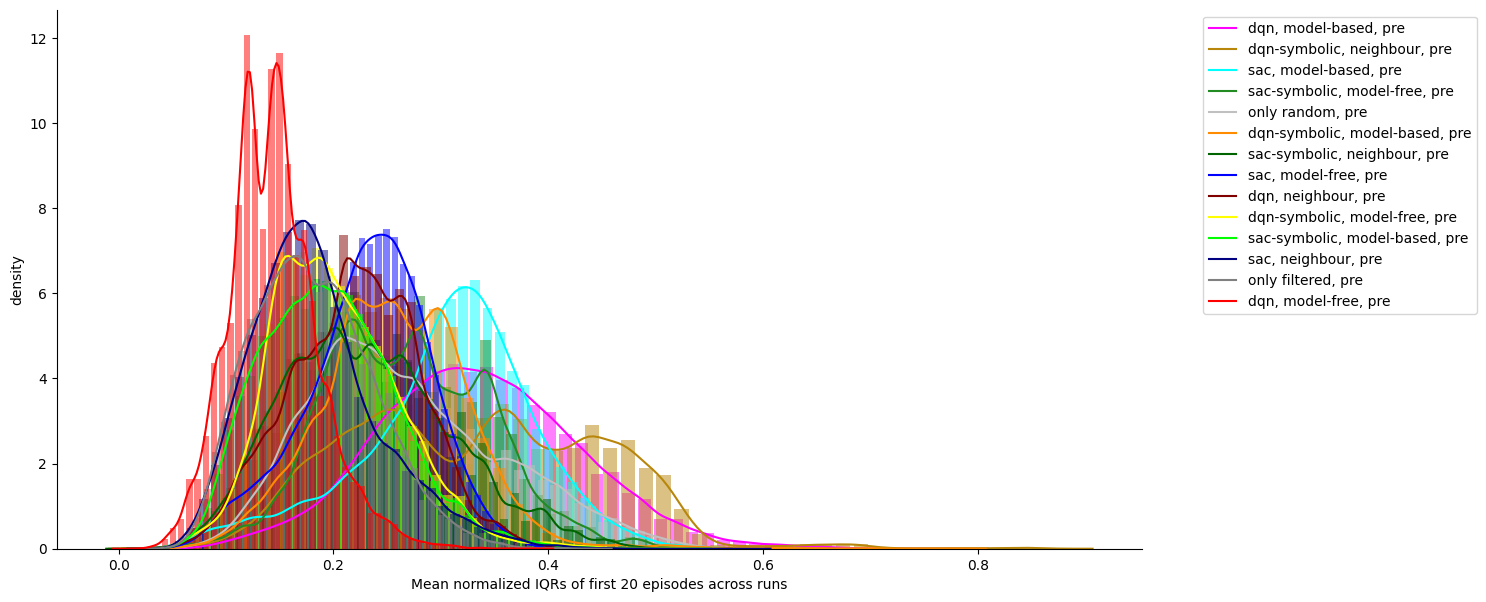

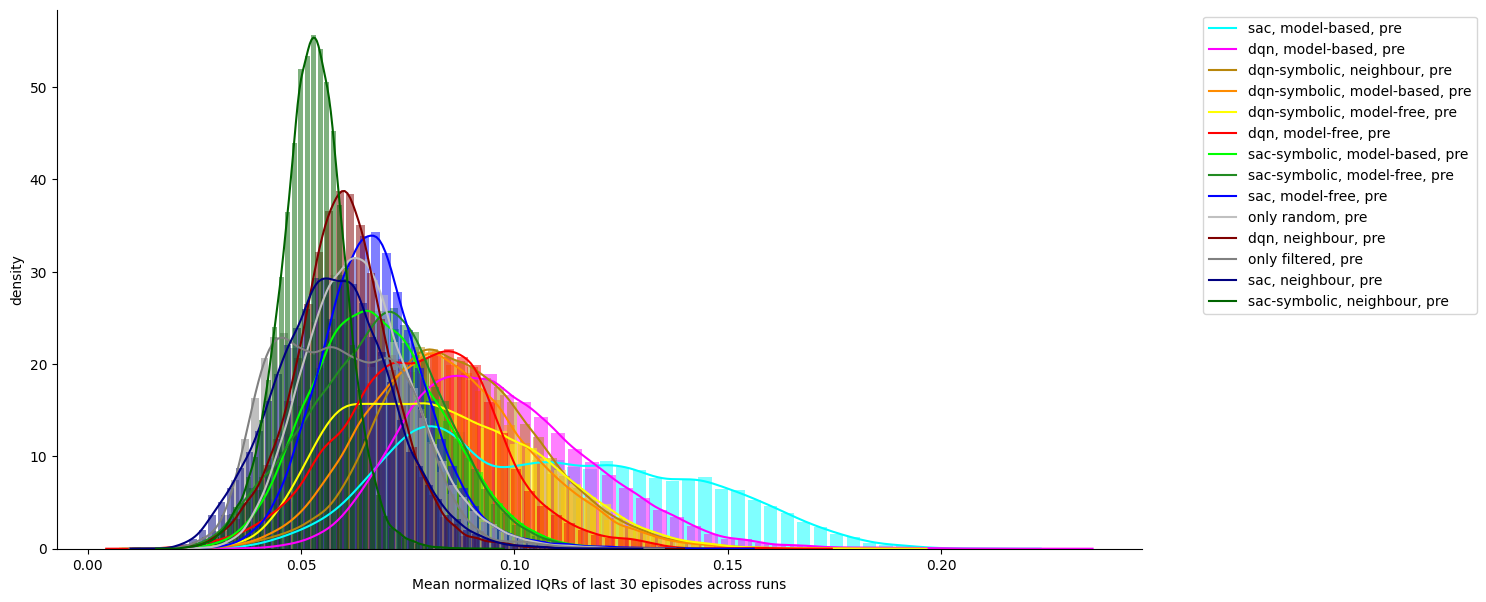

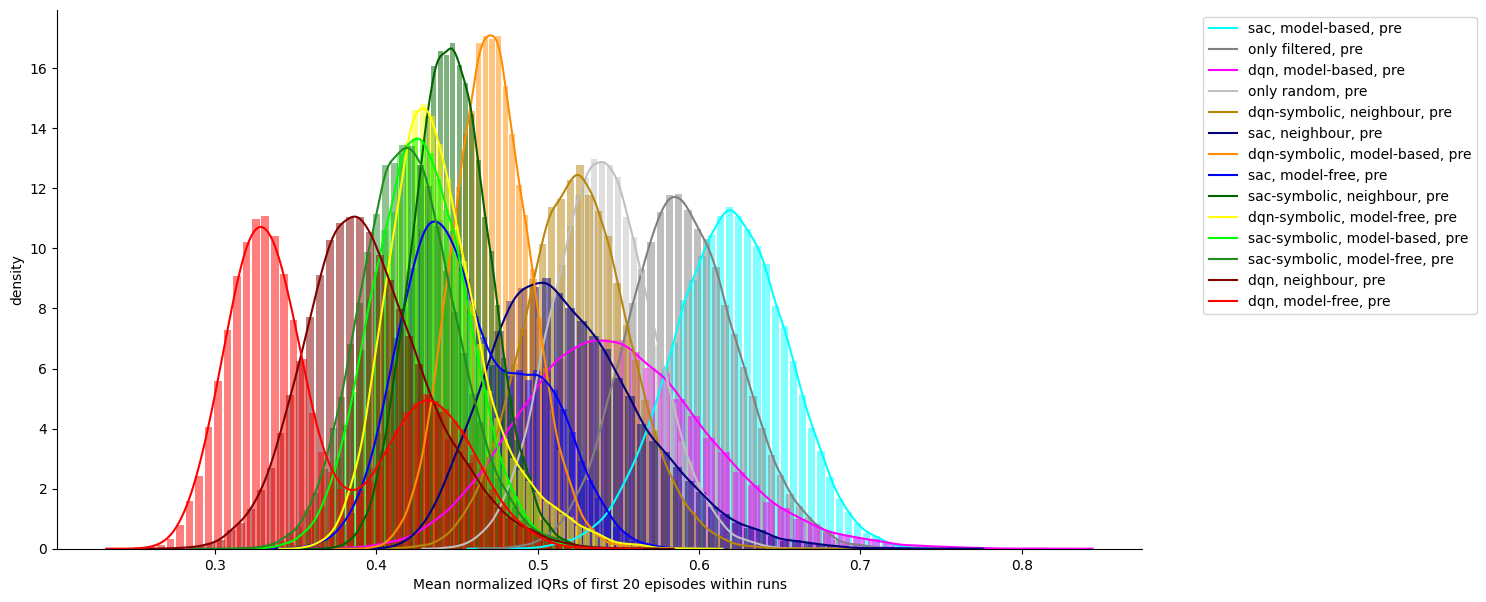

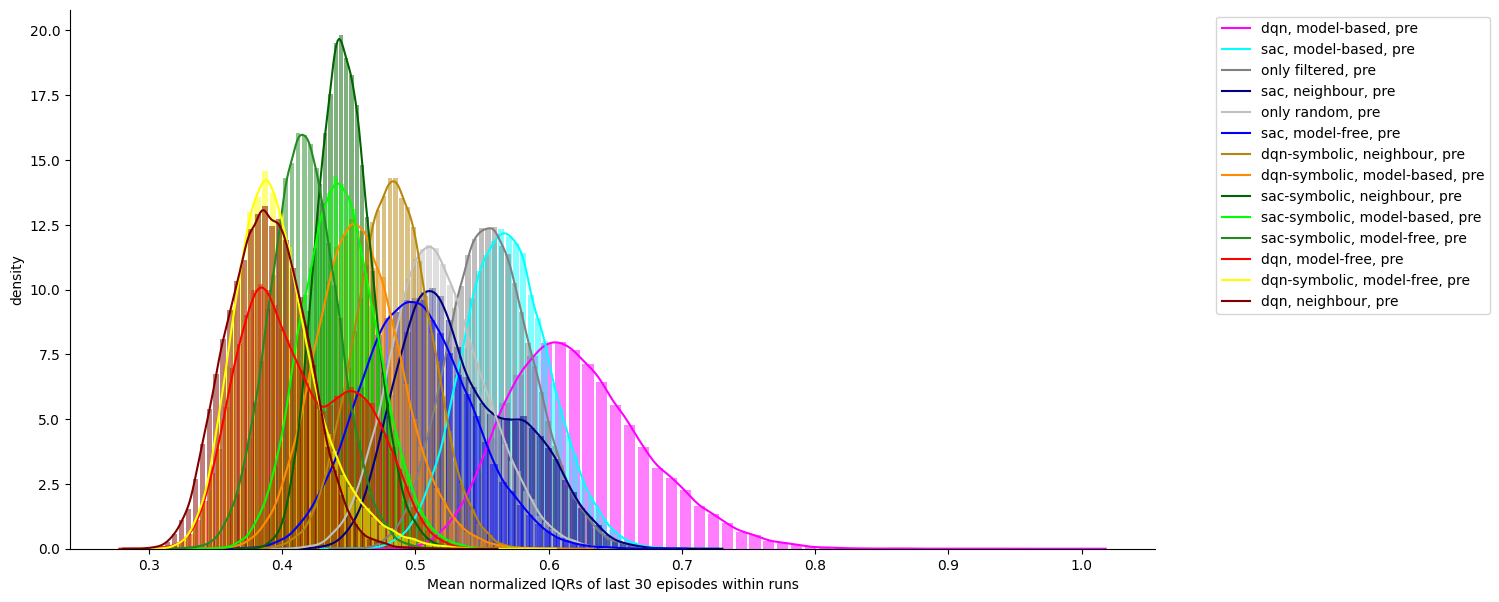

In [31]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import pickle
from functools import partial
from numpy import random
random.seed(42)
from tqdm import tqdm
import seaborn as sns
import pickle
import os
from scipy import stats


omega_c = 0.01
T = 5

SEEDS = [101,102,103,104,105]
AGENT_TYPES = ["prioritized","sac","prioritized_symbolic","sac_symbolic"]
MBRL_KEYS = ["non-mbrl","mbrl","neighbour"]

# mbrl_key = "non-mbrl"
# mbrl_key = "neighbour"
mbrl_key = "mbrl"

legend_dict = {
    "prioritized":"dqn",
    "sac":"sac",
    "prioritized_symbolic":"dqn-symbolic",
    "sac_symbolic":"sac-symbolic",
    "non-mbrl":"model-free",
    "neighbour":"neighbour",
    "mbrl":"model-based"
}

legend_dict_reverse = {
    "dqn":"prioritized",
    "sac":"sac",
    "dqn-symbolic":"prioritized_symbolic",
    "sac-symbolic":"sac_symbolic",
    "model-free":"non-mbrl",
    "neighbour":"neighbour",
    "model-based":"mbrl"
}

color_dict = {
    "dqn, model-free":"red",
    "sac, model-free":"blue",
    "dqn-symbolic, model-free":"yellow",
    "sac-symbolic, model-free":"forestgreen",
    "dqn, neighbour":"maroon",
    "sac, neighbour":"navy",
    "dqn-symbolic, neighbour":"darkgoldenrod",
    "sac-symbolic, neighbour":"darkgreen",
    "dqn, model-based":"magenta",
    "sac, model-based":"cyan",
    "dqn-symbolic, model-based":"darkorange",
    "sac-symbolic, model-based":"lime",
    "only filtered":"grey",
    "only random":"silver"
}

color_dict_pretrained = {
    "pretrained":{
        "dqn, model-free":"blue",
        "sac, model-free":"blue",
        "dqn-symbolic, model-free":"forestgreen",
        "sac-symbolic, model-free":"forestgreen",
        "dqn, neighbour":"navy",
        "sac, neighbour":"navy",
        "dqn-symbolic, neighbour":"darkgreen",
        "sac-symbolic, neighbour":"darkgreen",
        "dqn, model-based":"cyan",
        "sac, model-based":"cyan",
        "dqn-symbolic, model-based":"lime",
        "sac-symbolic, model-based":"lime",
        "only filtered":"grey",
        "only random":"silver"
    },
    "base":{
        "dqn, model-free":"red",
        "sac, model-free":"red",
        "dqn-symbolic, model-free":"yellow",
        "sac-symbolic, model-free":"yellow",
        "dqn, neighbour":"maroon",
        "sac, neighbour":"maroon",
        "dqn-symbolic, neighbour":"darkgoldenrod",
        "sac-symbolic, neighbour":"darkgoldenrod",
        "dqn, model-based":"magenta",
        "sac, model-based":"magenta",
        "dqn-symbolic, model-based":"darkorange",
        "sac-symbolic, model-based":"darkorange",
        "only filtered":"grey",
        "only random":"silver"
    }

}

def generate_path_for_pretrained_results(plot_tuple, seed, test_seed):
    data_key_tuple = (legend_dict_reverse[plot_tuple.split(", ")[0]],legend_dict_reverse[plot_tuple.split(", ")[1]])
    path = f"experiments/evaluations/pretraining_results/{data_key_tuple[0]}_{data_key_tuple[1]}_{seed}_{test_seed}.pickle"
    return path

def generate_path_for_results(plot_tuple,ground_type, drywet, seed):
    if plot_tuple == "only filtered":
        path = f"experiments/evaluations/results/symbolic_only_filter_{ground_type}_{drywet}_{seed}.pickle"
        return path
    elif plot_tuple == "only random":
        path = f"experiments/evaluations/results/only_random_{ground_type}_{drywet}_{seed}.pickle"
        return path
    else:
        data_key_tuple = (legend_dict_reverse[plot_tuple.split(", ")[0]],legend_dict_reverse[plot_tuple.split(", ")[1]])
        path = f"experiments/evaluations/results/{data_key_tuple[0]}_{data_key_tuple[1]}_{ground_type}_{drywet}_{seed}.pickle"
        return path
    

# folder_name = "dqn_all_pt_baseline"
# agent_type = "prioritized"
# agent_type2 = "prioritized_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "sac_all_pt_baseline"
# agent_type = "sac"
# agent_type2 = "sac_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

folder_name = "all_all_onlypt_baseline"
agent_type = "prioritized"
agent_type2 = "sac"
agent_type3 = "prioritized_symbolic"
agent_type4 = "sac_symbolic"

data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl"),(agent_type3,"non-mbrl"),(agent_type3,"neighbour"),(agent_type3,"mbrl"),(agent_type4,"non-mbrl"),(agent_type4,"neighbour"),(agent_type4,"mbrl")]


def plot_pretrained_bootstrapped_results(seeds, data_key_tuples, window_length, folder_name = None, n_bootstrap = 10, compare_flag = "pretrained"):
    ground_type = 0.0
    drywet = 1.0
    result_path_pretrained = "plots/statistical_tests/pretrained_results"
    result_path_base = "plots/statistical_tests/results_cropped90ep"
    n_runs = 15
    n_episodes = 90
    bootstrap_idxs_list = []
    for i in range(n_bootstrap):
        bootstrap_idxs_list.append(random.choice(range(n_runs),n_runs, replace=True))
    partial_calculate_iqr_across_time_window = partial(calculate_iqr_across_time_window, window_length=window_length)
    plot_tuples = [f"{legend_dict[dk_tuple[0]]}, {legend_dict[dk_tuple[1]]}" for dk_tuple in data_key_tuples]+["only filtered","only random"]
    intermediate_data_dict = {
        "pretrained":{},
        "base":{}
    }
    results_dict = {
        "pretrained":{},
        "base":{}        
    }
    bootstrap_results_dict = {
        "pretrained":{},
        "base":{}
    }
    if compare_flag == "both":
        keys = ["pretrained","base"]
    else:
        keys = ["pretrained"]
    for intended_key in keys:
        for plot_tuple in plot_tuples:
            if intended_key == "pretrained":
                if plot_tuple in ["only filtered","only random"]:
                    current_path = result_path_base+f"/{plot_tuple}_{n_bootstrap}.pickle"
                    key = "base"
                else:
                    current_path = result_path_pretrained+f"/{plot_tuple}_{n_bootstrap}.pickle"
                    key = "pretrained"
            else:
                if plot_tuple in ["only filtered","only random"]:
                    continue
                else:
                    current_path = result_path_base+f"/{plot_tuple}_{n_bootstrap}.pickle"
                    key = "base"

            if os.path.exists(current_path):
                with open(current_path,"rb") as f:
                    bootstrap_results_dict[key][plot_tuple] = pickle.load(f)
            else:    
                intermediate_data_dict[key][plot_tuple] = {}
                results_dict[key][plot_tuple] = {}
                bootstrap_results_dict[key][plot_tuple] = {}
                rewards_across_runs = np.empty((0,n_episodes))
                cumulative_rewards_across_runs = np.empty((0,n_episodes))
                diffs_during_runs = np.empty((0,n_episodes-1))
                for seed in seeds:
                    test_seeds = [seed+5,seed+10,seed+15]
                    for test_seed in test_seeds:
                        if key == "pretrained":
                            path = generate_path_for_pretrained_results(plot_tuple, seed, test_seed)
                        else:
                            path = generate_path_for_results(plot_tuple, ground_type, drywet, test_seed)
                        with open(path,"rb") as f:
                            result = pickle.load(f)
                        rewards = result["training_rewards"][:n_episodes]
                        diff_rewards = np.diff(rewards)
                        cumulative_rewards = result["cumulative_training_rewards"][:n_episodes]
                        rewards_across_runs = np.vstack((rewards_across_runs,rewards))
                        cumulative_rewards_across_runs = np.vstack((cumulative_rewards_across_runs,cumulative_rewards))
                        diffs_during_runs = np.vstack((diffs_during_runs,diff_rewards))

                intermediate_data_dict[key][plot_tuple]["mean_rewards_across_runs_first20"]=np.mean(rewards_across_runs[:,:20],axis=1)
                intermediate_data_dict[key][plot_tuple]["mean_rewards_across_runs_last30"]=np.mean(rewards_across_runs[:,-30:],axis=1)
                intermediate_data_dict[key][plot_tuple]["q95_rewards_across_runs"] = np.quantile(rewards_across_runs,0.95,axis=1)
                intermediate_data_dict[key][plot_tuple]["total_reward_across_runs"]=cumulative_rewards_across_runs[:,-1]
                intermediate_data_dict[key][plot_tuple]["lpf_rewards_across_runs"]=calculate_lpf_raw(rewards_across_runs, omega_c, T)
                iqrs_during_runs = np.apply_along_axis(partial_calculate_iqr_across_time_window,axis=1,arr=diffs_during_runs)
                intermediate_data_dict[key][plot_tuple]["mean_iqrs_during_runs_first20"]=np.mean(iqrs_during_runs[:,:20],axis=1)
                intermediate_data_dict[key][plot_tuple]["mean_iqrs_during_runs_last30"]=np.mean(iqrs_during_runs[:,-30:],axis=1)

                bootstrap_results_dict[key][plot_tuple]["mean_rewards_across_runs_first20"] = []
                bootstrap_results_dict[key][plot_tuple]["mean_rewards_across_runs_last30"] = []
                bootstrap_results_dict[key][plot_tuple]["mean_total_reward_across_runs"] = []
                bootstrap_results_dict[key][plot_tuple]["mean_iqrs_across_runs_first20"] = []
                bootstrap_results_dict[key][plot_tuple]["mean_iqrs_across_runs_last30"] = []
                bootstrap_results_dict[key][plot_tuple]["mean_iqrs_across_runs_first20_norm"] = []
                bootstrap_results_dict[key][plot_tuple]["mean_iqrs_across_runs_last30_norm"] = []
                bootstrap_results_dict[key][plot_tuple]["mean_iqrs_during_runs_first20"] = []
                bootstrap_results_dict[key][plot_tuple]["mean_iqrs_during_runs_last30"] = []
                bootstrap_results_dict[key][plot_tuple]["mean_iqrs_during_runs_first20_norm"] = []
                bootstrap_results_dict[key][plot_tuple]["mean_iqrs_during_runs_last30_norm"] = []
                for bootstrap_idxs in tqdm(bootstrap_idxs_list):
                    bootstrap_results_dict[key][plot_tuple]["mean_rewards_across_runs_first20"].append(np.mean(intermediate_data_dict[key][plot_tuple]["mean_rewards_across_runs_first20"][bootstrap_idxs]))
                    bootstrap_results_dict[key][plot_tuple]["mean_rewards_across_runs_last30"].append(np.mean(intermediate_data_dict[key][plot_tuple]["mean_rewards_across_runs_last30"][bootstrap_idxs]))
                    bootstrap_results_dict[key][plot_tuple]["mean_total_reward_across_runs"].append(np.mean(intermediate_data_dict[key][plot_tuple]["total_reward_across_runs"][bootstrap_idxs]))

                    # calculate q95 from rewards across runs
                    q95_max_bootstrapped = intermediate_data_dict[key][plot_tuple]["q95_rewards_across_runs"][bootstrap_idxs].max()

                    # IQR across runs calculation from LPF raw data
                    lpf_rewards_across_runs_bootstrapped = intermediate_data_dict[key][plot_tuple]["lpf_rewards_across_runs"][bootstrap_idxs]
                    iqr_across_runs_bootstrapped = calculate_IQR_across_runs_from_LPF(lpf_rewards_across_runs_bootstrapped)
                    mean_iqr_across_runs_bootstrapped_first20 = np.mean(iqr_across_runs_bootstrapped[:20])
                    mean_iqr_across_runs_bootstrapped_last30 = np.mean(iqr_across_runs_bootstrapped[-30:])
                    bootstrap_results_dict[key][plot_tuple]["mean_iqrs_across_runs_first20"].append(mean_iqr_across_runs_bootstrapped_first20)
                    bootstrap_results_dict[key][plot_tuple]["mean_iqrs_across_runs_last30"].append(mean_iqr_across_runs_bootstrapped_last30)
                    bootstrap_results_dict[key][plot_tuple]["mean_iqrs_across_runs_first20_norm"].append(mean_iqr_across_runs_bootstrapped_first20/q95_max_bootstrapped)
                    bootstrap_results_dict[key][plot_tuple]["mean_iqrs_across_runs_last30_norm"].append(mean_iqr_across_runs_bootstrapped_last30/q95_max_bootstrapped)

                    # IQR during runs calculation
                    mean_iqrs_during_runs_bootstrapped_first20 = np.mean(intermediate_data_dict[key][plot_tuple]["mean_iqrs_during_runs_first20"][bootstrap_idxs])
                    mean_iqrs_during_runs_bootstrapped_last30 = np.mean(intermediate_data_dict[key][plot_tuple]["mean_iqrs_during_runs_last30"][bootstrap_idxs])
                    bootstrap_results_dict[key][plot_tuple]["mean_iqrs_during_runs_first20"].append(mean_iqrs_during_runs_bootstrapped_first20)
                    bootstrap_results_dict[key][plot_tuple]["mean_iqrs_during_runs_last30"].append(mean_iqrs_during_runs_bootstrapped_last30)
                    bootstrap_results_dict[key][plot_tuple]["mean_iqrs_during_runs_first20_norm"].append(mean_iqrs_during_runs_bootstrapped_first20/q95_max_bootstrapped)
                    bootstrap_results_dict[key][plot_tuple]["mean_iqrs_during_runs_last30_norm"].append(mean_iqrs_during_runs_bootstrapped_last30/q95_max_bootstrapped)

                with open(current_path,"wb") as f:
                    pickle.dump(bootstrap_results_dict[key][plot_tuple],f)


    if folder_name is not None:
        general_path = f"plots/statistical_tests/pretrained_vis/{folder_name}"
        if not os.path.exists(general_path):
            os.makedirs(general_path)

    
    def plot_bootstrap_results_by_key(metric_key, xlabel, intended_keys = ["pretrained","base"]):
        # Mean first 20 training rewards
        plt.figure(figsize = (14,7))
        sorted_plot_tuples = []
        for intended_key in keys:
            for plot_tuple in plot_tuples:
                if intended_key == "pretrained":
                    if plot_tuple in ["only filtered","only random"]:
                        current_path = result_path_base+f"/{plot_tuple}_{n_bootstrap}.pickle"
                        type_key = "base"
                    else:
                        current_path = result_path_pretrained+f"/{plot_tuple}_{n_bootstrap}.pickle"
                        type_key = "pretrained"
                else:
                    if plot_tuple in ["only filtered","only random"]:
                        continue
                    else:
                        current_path = result_path_base+f"/{plot_tuple}_{n_bootstrap}.pickle"
                        type_key = "base"
                a = np.array(bootstrap_results_dict[type_key][plot_tuple][metric_key])
                tmp_mean = np.mean(a)
                tmp_std = np.std(a)
                sorted_plot_tuples.append((tmp_mean,plot_tuple,type_key))
        sorted_plot_tuples = sorted(sorted_plot_tuples, reverse = True)   
        for _, plot_tuple, type_key in sorted_plot_tuples:
            a = np.array(bootstrap_results_dict[type_key][plot_tuple][metric_key])
            if len(intended_keys)==2:
                plt.hist(a, bins=50, alpha=0.5, color=color_dict_pretrained[type_key][plot_tuple], density=True, rwidth = 0.8)
            else:
                plt.hist(a, bins=50, alpha=0.5, color=color_dict[plot_tuple], density=True, rwidth = 0.8)
            # Plot the percentiles
            # ci_lower, ci_upper = np.percentile(a, [2.5, 97.5])
            # plt.axvline(ci_lower, color=color_dict[plot_tuple], alpha = 0.7, linestyle='dotted', linewidth=1.0)
            # plt.axvline(ci_upper, color=color_dict[plot_tuple], alpha = 0.7, linestyle='dashed', linewidth=1.0)
        for _, plot_tuple, type_key in sorted_plot_tuples:
            a = np.array(bootstrap_results_dict[type_key][plot_tuple][metric_key])
            if len(intended_keys)==2:
                if type_key == "pretrained":
                    sns.kdeplot(a, color=color_dict_pretrained[type_key][plot_tuple], alpha=1.0, label = plot_tuple+", pre")
                else:
                    sns.kdeplot(a, color=color_dict_pretrained[type_key][plot_tuple], alpha=1.0, label = plot_tuple)
            else:
                sns.kdeplot(a, color=color_dict[plot_tuple], alpha=1.0, label = plot_tuple+", pre")
        plt.xlabel(xlabel)
        plt.ylabel("density")
        # put legend to the right of the plot
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        if folder_name is not None:
            image_path = f"{general_path}/{metric_key}.pdf"
            plt.savefig(image_path, bbox_inches='tight')
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.show()


    key = "mean_rewards_across_runs_first20"
    xlabel = "Mean first 20 training reward across runs"
    plot_bootstrap_results_by_key(key, xlabel, intended_keys = keys)

    key = "mean_rewards_across_runs_last30"
    xlabel = "Mean last 30 training reward across runs"
    plot_bootstrap_results_by_key(key, xlabel, intended_keys = keys)

    key = "mean_total_reward_across_runs"
    xlabel = "Mean total reward across runs"
    plot_bootstrap_results_by_key(key, xlabel, intended_keys = keys)

    key = "mean_iqrs_across_runs_first20_norm"
    xlabel = "Mean normalized IQRs of first 20 episodes across runs"
    plot_bootstrap_results_by_key(key, xlabel, intended_keys = keys)

    key = "mean_iqrs_across_runs_last30_norm"
    xlabel = "Mean normalized IQRs of last 30 episodes across runs"
    plot_bootstrap_results_by_key(key, xlabel, intended_keys = keys)

    key = "mean_iqrs_during_runs_first20_norm"
    xlabel = "Mean normalized IQRs of first 20 episodes within runs"
    plot_bootstrap_results_by_key(key, xlabel, intended_keys = keys)

    key = "mean_iqrs_during_runs_last30_norm"
    xlabel = "Mean normalized IQRs of last 30 episodes within runs"
    plot_bootstrap_results_by_key(key, xlabel, intended_keys = keys)

plot_pretrained_bootstrapped_results(SEEDS, data_key_tuples = data_key_tuples, window_length = 15, folder_name = folder_name, n_bootstrap = 50000, compare_flag = "pretraining")

## Barplots Main Results

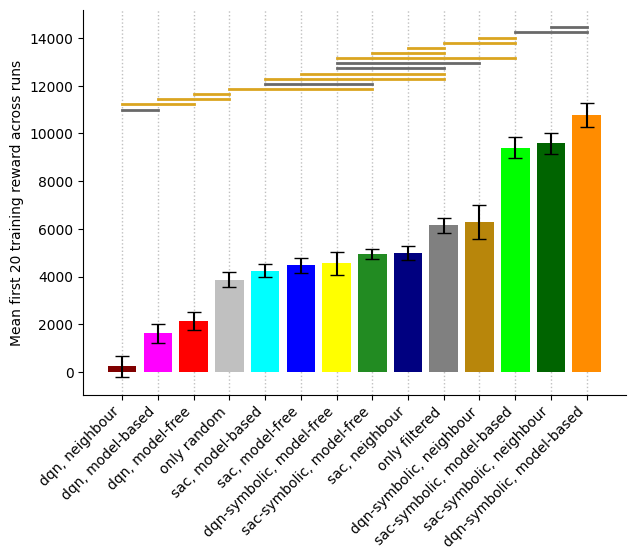

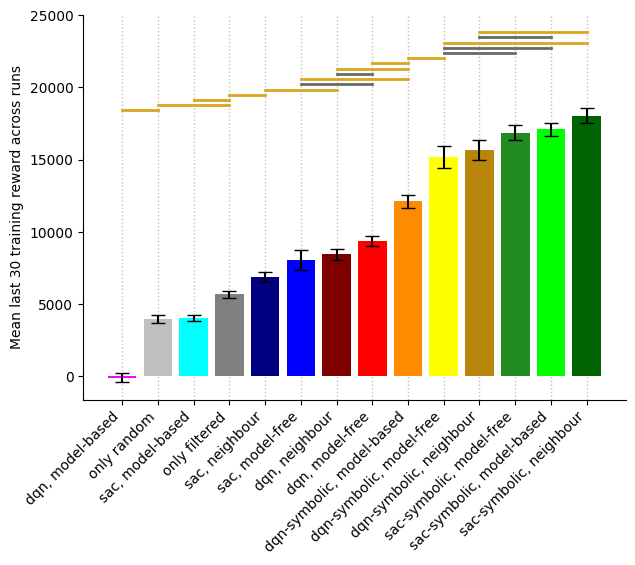

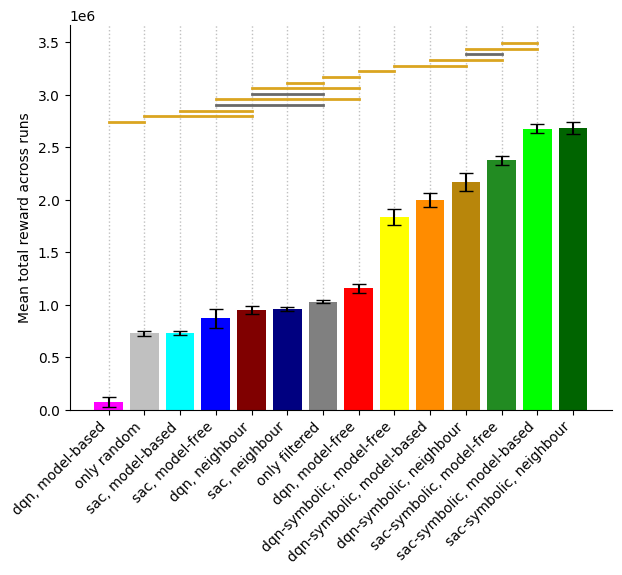

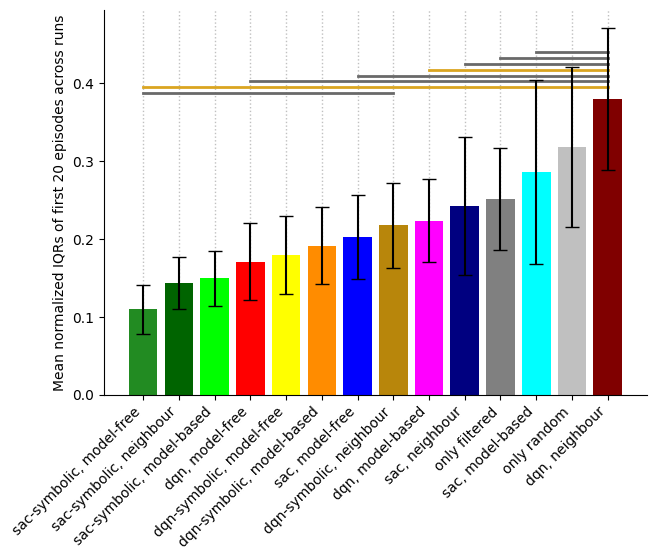

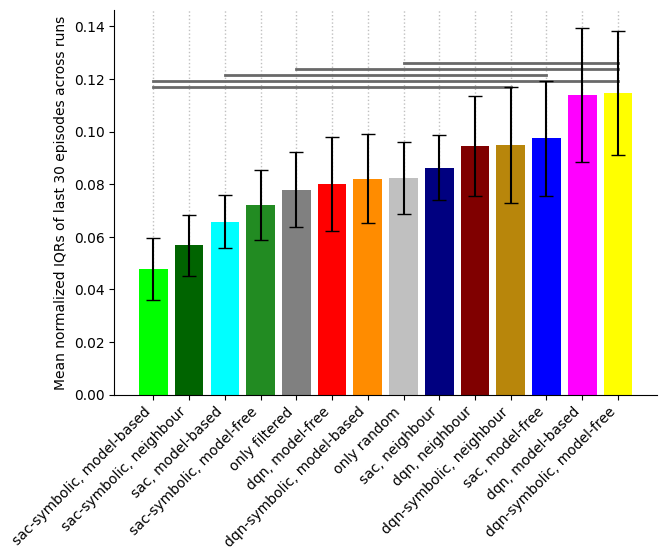

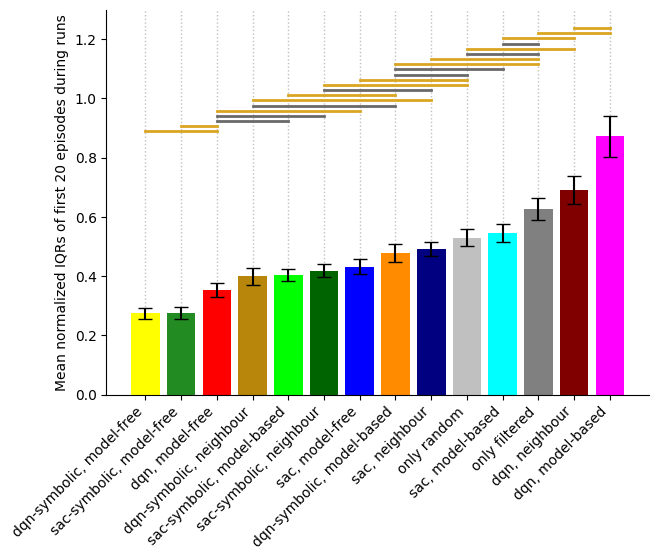

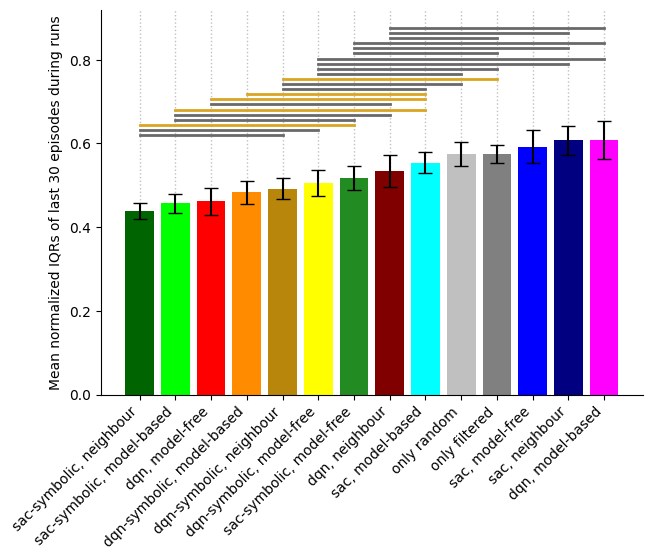

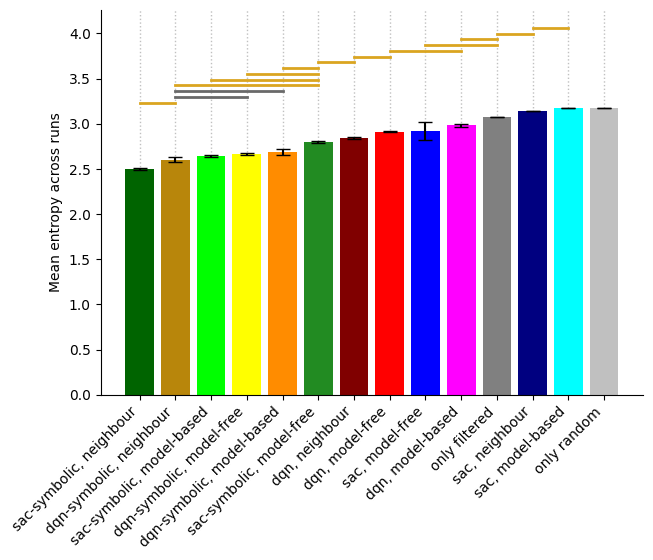

In [89]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import pickle
from functools import partial
from numpy import random
random.seed(42)
from tqdm import tqdm
import seaborn as sns
import pickle
import os
from scipy import stats


omega_c = 0.01
T = 5

SEEDS = [101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120]
AGENT_TYPES = ["prioritized","sac","prioritized_symbolic","sac_symbolic"]
MBRL_KEYS = ["non-mbrl","mbrl","neighbour"]
GROUND_TYPES = [-1.0,0.0,1.0]
DRYWETS = [0.0,1.0]
data_type = "cumulative_training_rewards"

# mbrl_key = "non-mbrl"
# mbrl_key = "neighbour"
mbrl_key = "mbrl"

legend_dict = {
    "prioritized":"dqn",
    "sac":"sac",
    "prioritized_symbolic":"dqn-symbolic",
    "sac_symbolic":"sac-symbolic",
    "non-mbrl":"model-free",
    "neighbour":"neighbour",
    "mbrl":"model-based"
}

legend_dict_reverse = {
    "dqn":"prioritized",
    "sac":"sac",
    "dqn-symbolic":"prioritized_symbolic",
    "sac-symbolic":"sac_symbolic",
    "model-free":"non-mbrl",
    "neighbour":"neighbour",
    "model-based":"mbrl"
}

color_dict = {
    "dqn, model-free":"red",
    "sac, model-free":"blue",
    "dqn-symbolic, model-free":"yellow",
    "sac-symbolic, model-free":"forestgreen",
    "dqn, neighbour":"maroon",
    "sac, neighbour":"navy",
    "dqn-symbolic, neighbour":"darkgoldenrod",
    "sac-symbolic, neighbour":"darkgreen",
    "dqn, model-based":"magenta",
    "sac, model-based":"cyan",
    "dqn-symbolic, model-based":"darkorange",
    "sac-symbolic, model-based":"lime",
    "only filtered":"grey",
    "only random":"silver"
}


def generate_path_for_results(plot_tuple,ground_type, drywet, seed):
    if plot_tuple == "only filtered":
        path = f"experiments/evaluations/results/symbolic_only_filter_{ground_type}_{drywet}_{seed}.pickle"
        return path
    elif plot_tuple == "only random":
        path = f"experiments/evaluations/results/only_random_{ground_type}_{drywet}_{seed}.pickle"
        return path
    else:
        data_key_tuple = (legend_dict_reverse[plot_tuple.split(", ")[0]],legend_dict_reverse[plot_tuple.split(", ")[1]])
        path = f"experiments/evaluations/results/{data_key_tuple[0]}_{data_key_tuple[1]}_{ground_type}_{drywet}_{seed}.pickle"
        return path
    
# folder_name = "all_non-symbolic_nopt_baseline"
# agent_type = "sac"
# agent_type2 = "prioritized"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "all_symbolic_nopt_baseline"
# agent_type = "sac_symbolic"
# agent_type2 = "prioritized_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "dqn_all_nopt_baseline"
# agent_type = "prioritized"
# agent_type2 = "prioritized_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "sac_all_nopt_baseline"
# agent_type = "sac"
# agent_type2 = "sac_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

folder_name = "all_all_nopt_baseline"
agent_type = "prioritized"
agent_type2 = "sac"
agent_type3 = "prioritized_symbolic"
agent_type4 = "sac_symbolic"
data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl"),(agent_type3,"non-mbrl"),(agent_type3,"neighbour"),(agent_type3,"mbrl"),(agent_type4,"non-mbrl"),(agent_type4,"neighbour"),(agent_type4,"mbrl")]



def create_intermediate_results(seeds, ground_type, drywet, data_key_tuples, window_length, overwrite = False):
    intermediate_result_path = "plots/statistical_tests/intermediate_results"
    partial_calculate_iqr_across_time_window = partial(calculate_iqr_across_time_window, window_length=window_length)
    plot_tuples = [f"{legend_dict[dk_tuple[0]]}, {legend_dict[dk_tuple[1]]}" for dk_tuple in data_key_tuples]+["only filtered","only random"]
    intermediate_data_dict = {}
    for plot_tuple in plot_tuples:
        # check if path  already exists
        current_path = intermediate_result_path+f"/{plot_tuple}.pickle"
        # check if file exists under the path
        if os.path.exists(current_path) and not overwrite:
            with open(current_path,"rb") as f:
                intermediate_data_dict[plot_tuple] = pickle.load(f)
        else:
            intermediate_data_dict[plot_tuple] = {}
            rewards_across_runs = np.empty((0,180))
            cumulative_rewards_across_runs = np.empty((0,180))
            diffs_during_runs = np.empty((0,179))
            entropy_across_runs = []
            for seed in seeds:
                path = generate_path_for_results(plot_tuple, ground_type, drywet, seed)
                with open(path,"rb") as f:
                    result = pickle.load(f)
                rewards = result["training_rewards"]
                diff_rewards = np.diff(rewards)
                cumulative_rewards = result["cumulative_training_rewards"]
                rewards_across_runs = np.vstack((rewards_across_runs,rewards))
                cumulative_rewards_across_runs = np.vstack((cumulative_rewards_across_runs,cumulative_rewards))
                diffs_during_runs = np.vstack((diffs_during_runs,diff_rewards))
                entropy_across_runs.append(calculate_entropy(result["crops_selected_idxs_list"]))

            intermediate_data_dict[plot_tuple]["mean_rewards_across_runs_first20"]=np.mean(rewards_across_runs[:,:20],axis=1)
            intermediate_data_dict[plot_tuple]["mean_rewards_across_runs_last30"]=np.mean(rewards_across_runs[:,-30:],axis=1)
            intermediate_data_dict[plot_tuple]["q95_rewards_across_runs"] = np.quantile(rewards_across_runs,0.95,axis=1)
            intermediate_data_dict[plot_tuple]["total_reward_across_runs"]=cumulative_rewards_across_runs[:,-1]
            intermediate_data_dict[plot_tuple]["lpf_rewards_across_runs"]=calculate_lpf_raw(rewards_across_runs, omega_c, T)
            iqrs_during_runs = np.apply_along_axis(partial_calculate_iqr_across_time_window,axis=1,arr=diffs_during_runs)
            intermediate_data_dict[plot_tuple]["mean_iqrs_during_runs_first20"]=np.mean(iqrs_during_runs[:,:20],axis=1)
            intermediate_data_dict[plot_tuple]["mean_iqrs_during_runs_last30"]=np.mean(iqrs_during_runs[:,-30:],axis=1)
            intermediate_data_dict[plot_tuple]["mean_iqrs_during_runs_first20_norm"]=np.mean(iqrs_during_runs[:,:20],axis=1)/(intermediate_data_dict[plot_tuple]["q95_rewards_across_runs"].max())
            intermediate_data_dict[plot_tuple]["mean_iqrs_during_runs_last30_norm"]=np.mean(iqrs_during_runs[:,-30:],axis=1)/(intermediate_data_dict[plot_tuple]["q95_rewards_across_runs"].max())
            intermediate_data_dict[plot_tuple]["entropy_across_runs"]=np.array(entropy_across_runs)
            

            with open(current_path,"wb") as f:
                pickle.dump(intermediate_data_dict[plot_tuple],f)
    return intermediate_data_dict


def permutation_test_mean(means1, means2, n_permutations):
    assert len(means1) == len(means2)
    n = len(means1)
    mean_diff = np.mean(means1) - np.mean(means2)
    all_means = np.concatenate((means1,means2))
    num_greater = 0
    for i in range(n_permutations):
        all_means_permuted = random.permutation(all_means)
        mean_diff_permuted = np.mean(all_means_permuted[:n]) - np.mean(all_means_permuted[n:])
        if mean_diff_permuted > mean_diff:
            num_greater += 1
    return num_greater/n_permutations

def permutation_test_normalized_iqrs(lpf_rewards1, lpf_rewards2, q95s1, q95s2, n_permutations):
    normalized_iqr_across_runs1 = calculate_IQR_across_runs_from_LPF(lpf_rewards1)/(q95s1.max())
    normalized_iqr_across_runs2 = calculate_IQR_across_runs_from_LPF(lpf_rewards2)/(q95s2.max())
    n = normalized_iqr_across_runs1.shape[0]
    mean_diff = np.mean(normalized_iqr_across_runs1) - np.mean(normalized_iqr_across_runs2)
    concatenated_lpf_rewards = np.vstack((lpf_rewards1,lpf_rewards2))
    concatenated_q95s = np.concatenate((q95s1,q95s2))
    combined_length = concatenated_lpf_rewards.shape[0]
    unpermuted_idxs = np.arange(combined_length)
    num_greater = 0
    for i in range(n_permutations):
        permuted_idxs = random.permutation(unpermuted_idxs)
        permuted_lpf_rewards = concatenated_lpf_rewards[permuted_idxs]
        permuted_q95s = concatenated_q95s[permuted_idxs]
        permuted_lpf_rewards1 = calculate_IQR_across_runs_from_LPF(permuted_lpf_rewards[:n])
        permuted_lpf_rewards2 = calculate_IQR_across_runs_from_LPF(permuted_lpf_rewards[n:])
        normalized_permuted_lpf_rewards1 = permuted_lpf_rewards1/(permuted_q95s[:n].max())
        normalized_permuted_lpf_rewards2 = permuted_lpf_rewards2/(permuted_q95s[n:].max())
        mean_diff_permuted = np.mean(normalized_permuted_lpf_rewards1) - np.mean(normalized_permuted_lpf_rewards2)
        if mean_diff_permuted > mean_diff:
            num_greater += 1
    return num_greater/n_permutations

def run_2sample_statistical_tests(plot_tuple1, plot_tuple2,window_length, folder_name, n_permutations = 10, overwrite = False):
    folder_path = f"plots/statistical_tests/results/{folder_name}"
    sig_results_path = f"plots/statistical_tests/results/{folder_name}/significance_results.pickle"
    if os.path.exists(sig_results_path):
        with open(sig_results_path,"rb") as f:
            sig_results = pickle.load(f)
    else:
        if not os.path.exists(folder_path):
            os.makedirs(folder_path, exist_ok=True)
        sig_results = {}
    result_path = "plots/statistical_tests/intermediate_results"
    path1 = result_path+f"/{plot_tuple1}.pickle"
    path2 = result_path+f"/{plot_tuple2}.pickle"
    assert os.path.exists(path1), f"Path {path1} for tuple {plot_tuple1} does not exist"
    assert os.path.exists(path2), f"Path {path2} for tuple {plot_tuple2} does not exist"
    with open(path1,"rb") as f:
        intermediate_data_dict1 = pickle.load(f)
    with open(path2,"rb") as f:
        intermediate_data_dict2 = pickle.load(f)
    if plot_tuple1 in sig_results:
        if plot_tuple2 in sig_results[plot_tuple1]:
            if not overwrite:
                return None
            else:
                print("Already calculated.")
        else:
            sig_results[plot_tuple1][plot_tuple2] = {}
    else:
        sig_results[plot_tuple1] = {}
        sig_results[plot_tuple1][plot_tuple2] = {}
    if plot_tuple2 not in sig_results:
        sig_results[plot_tuple2] = {}
        sig_results[plot_tuple2][plot_tuple1] = {}
    else:
        if plot_tuple1 not in sig_results[plot_tuple2]:
            sig_results[plot_tuple2][plot_tuple1] = {}
    
    
    
    # mean rewards across runs first 20
    means1 = intermediate_data_dict1["mean_rewards_across_runs_first20"]
    means2 = intermediate_data_dict2["mean_rewards_across_runs_first20"]
    p_value = permutation_test_mean(means1, means2, n_permutations)
    print(f"Mean rewards across runs first: {plot_tuple1} > {plot_tuple2}? with p-value {p_value}")
    sig_results[plot_tuple1][plot_tuple2]["mean_rewards_across_runs_first20_1>2"] = p_value
    sig_results[plot_tuple2][plot_tuple1]["mean_rewards_across_runs_first20_1>2"] = 1-p_value

    # mean rewards across runs last 30
    means1 = intermediate_data_dict1["mean_rewards_across_runs_last30"]
    means2 = intermediate_data_dict2["mean_rewards_across_runs_last30"]
    p_value = permutation_test_mean(means1, means2, n_permutations)
    print(f"Mean rewards across runs last 30: {plot_tuple1} > {plot_tuple2}? with p-value {p_value}")
    sig_results[plot_tuple1][plot_tuple2]["mean_rewards_across_runs_last30_1>2"] = p_value
    sig_results[plot_tuple2][plot_tuple1]["mean_rewards_across_runs_last30_1>2"] = 1-p_value


    # mean total reward across runs
    means1 = intermediate_data_dict1["total_reward_across_runs"]
    means2 = intermediate_data_dict2["total_reward_across_runs"]
    p_value = permutation_test_mean(means1, means2, n_permutations)
    print(f"Mean total reward across runs: {plot_tuple1} > {plot_tuple2}? with p-value {p_value}")
    sig_results[plot_tuple1][plot_tuple2]["total_reward_across_runs_1>2"] = p_value
    sig_results[plot_tuple2][plot_tuple1]["total_reward_across_runs_1>2"] = 1-p_value

    # mean iqr across runs first 20 normalized
    lpf_rewards1 = intermediate_data_dict1["lpf_rewards_across_runs"]
    lpf_rewards2 = intermediate_data_dict2["lpf_rewards_across_runs"]
    lpf_rewards1_first20 = lpf_rewards1[:,:20]
    lpf_rewards2_first20 = lpf_rewards2[:,:20]
    lpf_rewards1_last30 = lpf_rewards1[:,-30:]
    lpf_rewards2_last30 = lpf_rewards2[:,-30:]
    q95s = intermediate_data_dict1["q95_rewards_across_runs"]
    q95s = intermediate_data_dict2["q95_rewards_across_runs"]
    p_value_first20 = permutation_test_normalized_iqrs(lpf_rewards1_first20, lpf_rewards2_first20, q95s, q95s, n_permutations)
    p_value_last30 = permutation_test_normalized_iqrs(lpf_rewards1_last30, lpf_rewards2_last30, q95s, q95s, n_permutations)
    print(f"Mean normalized IQRs across runs first 20: {plot_tuple1} > {plot_tuple2}? with p-value {p_value_first20}")
    print(f"Mean normalized IQRs across runs last 30: {plot_tuple1} > {plot_tuple2}? with p-value {p_value_last30}")
    sig_results[plot_tuple1][plot_tuple2]["mean_iqrs_across_runs_first20_norm_1>2"] = p_value_first20
    sig_results[plot_tuple2][plot_tuple1]["mean_iqrs_across_runs_first20_norm_1>2"] = 1-p_value_first20
    sig_results[plot_tuple1][plot_tuple2]["mean_iqrs_across_runs_last30_norm_1>2"] = p_value_last30
    sig_results[plot_tuple2][plot_tuple1]["mean_iqrs_across_runs_last30_norm_1>2"] = 1-p_value_last30
    # mean iqr during runs first 20 normalized
    iqrs_during_runs1 = intermediate_data_dict1["mean_iqrs_during_runs_first20_norm"]
    iqrs_during_runs2 = intermediate_data_dict2["mean_iqrs_during_runs_first20_norm"]
    p_value = permutation_test_mean(iqrs_during_runs1, iqrs_during_runs2, n_permutations)
    print(f"Mean normalized IQRs during runs first 20: {plot_tuple1} > {plot_tuple2}? with p-value {p_value}")
    sig_results[plot_tuple1][plot_tuple2]["mean_iqrs_during_runs_first20_norm_1>2"] = p_value
    sig_results[plot_tuple2][plot_tuple1]["mean_iqrs_during_runs_first20_norm_1>2"] = 1-p_value
    

    # mean iqr during runs last 30 normalized
    iqrs_during_runs1 = intermediate_data_dict1["mean_iqrs_during_runs_last30_norm"]
    iqrs_during_runs2 = intermediate_data_dict2["mean_iqrs_during_runs_last30_norm"]
    p_value = permutation_test_mean(iqrs_during_runs1, iqrs_during_runs2, n_permutations)
    print(f"Mean normalized IQRs during runs last 30: {plot_tuple1} > {plot_tuple2}? with p-value {p_value}")
    sig_results[plot_tuple1][plot_tuple2]["mean_iqrs_during_runs_last30_norm_1>2"] = p_value
    sig_results[plot_tuple2][plot_tuple1]["mean_iqrs_during_runs_last30_norm_1>2"] = 1-p_value

    entropy_across_runs1 = intermediate_data_dict1["entropy_across_runs"]
    entropy_across_runs2 = intermediate_data_dict2["entropy_across_runs"]
    p_value = permutation_test_mean(entropy_across_runs1, entropy_across_runs2, n_permutations)
    print(f"Mean entropy across runs: {plot_tuple1} > {plot_tuple2}? with p-value {p_value}")
    sig_results[plot_tuple1][plot_tuple2]["entropy_across_runs_1>2"] = p_value
    sig_results[plot_tuple2][plot_tuple1]["entropy_across_runs_1>2"] = 1-p_value

    with open(sig_results_path,"wb") as f:
        pickle.dump(sig_results,f)

    return sig_results_path

def barplot_means_and_sigdiffs(seeds, ground_type, drywet, data_key_tuples, window_length, folder_name = None, n_permutations = 1000, overwrite = False):
    result_path = "plots/statistical_tests/results"
    sig_results_path = f"{result_path}/{folder_name}/significance_results.pickle"
    intermediate_results_dict = create_intermediate_results(seeds, ground_type, drywet, data_key_tuples, window_length, overwrite = overwrite)
    plot_tuples = [f"{legend_dict[dk_tuple[0]]}, {legend_dict[dk_tuple[1]]}" for dk_tuple in data_key_tuples]+["only filtered","only random"]
    if folder_name is not None:
        general_path = f"plots/statistical_tests/vis/{folder_name}"
        if not os.path.exists(general_path):
            os.makedirs(general_path)
    for plot_tuple1 in plot_tuples:
        for plot_tuple2 in plot_tuples[1:]:
            if plot_tuple1 != plot_tuple2:
                run_2sample_statistical_tests(plot_tuple1, plot_tuple2, window_length, folder_name, n_permutations = n_permutations, overwrite = overwrite)

    with open(sig_results_path,"rb") as f:
        sig_results = pickle.load(f)
    bootstrap_results_dict = {}
    for plot_tuple in plot_tuples:
        bootstrap_results_path = result_path+f"/{plot_tuple}_{50000}.pickle"
        if os.path.exists(bootstrap_results_path):
            with open(bootstrap_results_path,"rb") as f:
                bootstrap_results_dict[plot_tuple] = pickle.load(f)
        else:
            raise ValueError(f"Path {bootstrap_results_path} does not exist.")


    def plot_for_single_metric(key, ylabel, bootstrap_key = None):
        if not bootstrap_key:
            bootstrap_key = key
        # Mean first 20 training rewards barplot with significance levels
        plt.figure(figsize = (7,5))
        sorted_plot_tuples = []
        max_mean = -np.inf
        for plot_tuple in plot_tuples:
            a = np.array(bootstrap_results_dict[plot_tuple][bootstrap_key])
            tmp_mean = np.mean(a)
            if tmp_mean > max_mean:
                max_mean = tmp_mean
            sorted_plot_tuples.append((tmp_mean,plot_tuple))
        sorted_plot_tuples = sorted(sorted_plot_tuples)   
        a = np.array([bootstrap_results_dict[plot_tuple][bootstrap_key] for _, plot_tuple in sorted_plot_tuples])
        plt.bar(range(len(plot_tuples)),a.mean(axis=1),yerr=a.std(axis=1),color=[color_dict[plot_tuple] for _, plot_tuple in sorted_plot_tuples],capsize=5, zorder=2)
        plt.xticks(range(len(plot_tuples)), [plot_tuple for _, plot_tuple in sorted_plot_tuples], rotation=45, ha="right")
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        num_rows = a.shape[0]
        num_differences = 1
        for i in range(num_rows):
            for j in range(i+1, num_rows):
                if i != j:
                    plot_tuple1, plot_tuple2 = sorted_plot_tuples[i][1], sorted_plot_tuples[j][1]
                    if sig_results[plot_tuple1][plot_tuple2][f"{key}_1>2"] > 0.99:
                        plt.plot([i, j], [max_mean + num_differences*0.02*max_mean, max_mean + num_differences*0.02*max_mean], color='goldenrod', linewidth=2.0)
                        num_differences += 1
                        break
                    elif sig_results[plot_tuple1][plot_tuple2][f"{key}_1>2"] > 0.95:
                        plt.plot([i, j], [max_mean + num_differences*0.02*max_mean, max_mean + num_differences*0.02*max_mean], color='dimgrey', linewidth=2.0)
                        num_differences += 1

        for i, t in enumerate(sorted_plot_tuples):
            plt.axvline(i, color='silver', alpha = 1.0, linestyle='dotted', linewidth=1.0, zorder=1)
        plt.ylabel(ylabel)
        if folder_name is not None:
            image_path = f"{general_path}/{bootstrap_key}_barplot.pdf"
            plt.savefig(image_path, bbox_inches='tight')
        plt.show()

    key = "mean_rewards_across_runs_first20"
    ylabel = "Mean first 20 training reward across runs"
    plot_for_single_metric(key, ylabel)

    key = "mean_rewards_across_runs_last30"
    ylabel = "Mean last 30 training reward across runs"
    plot_for_single_metric(key, ylabel)

    key = "total_reward_across_runs"
    ylabel = "Mean total reward across runs"
    bootstrap_key = "mean_total_reward_across_runs"
    plot_for_single_metric(key, ylabel, bootstrap_key = bootstrap_key)

    key = "mean_iqrs_across_runs_first20_norm"
    ylabel = "Mean normalized IQRs of first 20 episodes across runs"
    plot_for_single_metric(key,ylabel)

    key = "mean_iqrs_across_runs_last30_norm"
    ylabel = "Mean normalized IQRs of last 30 episodes across runs"
    plot_for_single_metric(key,ylabel)

    key = "mean_iqrs_during_runs_first20_norm"
    ylabel = "Mean normalized IQRs of first 20 episodes during runs"
    plot_for_single_metric(key,ylabel)

    key = "mean_iqrs_during_runs_last30_norm"
    ylabel = "Mean normalized IQRs of last 30 episodes during runs"
    plot_for_single_metric(key,ylabel)

    key = "entropy_across_runs"
    ylabel = "Mean entropy across runs"
    bootstrap_key = "mean_entropy_across_runs"
    plot_for_single_metric(key,ylabel, bootstrap_key=bootstrap_key)

barplot_means_and_sigdiffs(SEEDS, ground_type = 0.0,drywet = 1.0, data_key_tuples = data_key_tuples, window_length = 15, folder_name = folder_name, n_permutations = 1000, overwrite = False)

### Pretraining barplots

In [69]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import pickle
from functools import partial
from numpy import random
random.seed(42)
from tqdm import tqdm
import seaborn as sns
import pickle
import os
from scipy import stats


omega_c = 0.01
T = 5

SEEDS = [101,102,103,104,105]
AGENT_TYPES = ["prioritized","sac","prioritized_symbolic","sac_symbolic"]
MBRL_KEYS = ["non-mbrl","mbrl","neighbour"]
GROUND_TYPES = [-1.0,0.0,1.0]
DRYWETS = [0.0,1.0]
data_type = "cumulative_training_rewards"

# mbrl_key = "non-mbrl"
# mbrl_key = "neighbour"
mbrl_key = "mbrl"

legend_dict = {
    "prioritized":"dqn",
    "sac":"sac",
    "prioritized_symbolic":"dqn-symbolic",
    "sac_symbolic":"sac-symbolic",
    "non-mbrl":"model-free",
    "neighbour":"neighbour",
    "mbrl":"model-based"
}

legend_dict_reverse = {
    "dqn":"prioritized",
    "sac":"sac",
    "dqn-symbolic":"prioritized_symbolic",
    "sac-symbolic":"sac_symbolic",
    "model-free":"non-mbrl",
    "neighbour":"neighbour",
    "model-based":"mbrl"
}

color_dict = {
    "dqn, model-free":"red",
    "sac, model-free":"blue",
    "dqn-symbolic, model-free":"yellow",
    "sac-symbolic, model-free":"forestgreen",
    "dqn, neighbour":"maroon",
    "sac, neighbour":"navy",
    "dqn-symbolic, neighbour":"darkgoldenrod",
    "sac-symbolic, neighbour":"darkgreen",
    "dqn, model-based":"magenta",
    "sac, model-based":"cyan",
    "dqn-symbolic, model-based":"darkorange",
    "sac-symbolic, model-based":"lime",
    "only filtered":"grey",
    "only random":"silver"
}


def generate_path_for_results(plot_tuple,ground_type, drywet, seed):
    if plot_tuple == "only filtered":
        path = f"experiments/evaluations/results/symbolic_only_filter_{ground_type}_{drywet}_{seed}.pickle"
        return path
    elif plot_tuple == "only random":
        path = f"experiments/evaluations/results/only_random_{ground_type}_{drywet}_{seed}.pickle"
        return path
    else:
        data_key_tuple = (legend_dict_reverse[plot_tuple.split(", ")[0]],legend_dict_reverse[plot_tuple.split(", ")[1]])
        path = f"experiments/evaluations/results/{data_key_tuple[0]}_{data_key_tuple[1]}_{ground_type}_{drywet}_{seed}.pickle"
        return path
    
# folder_name = "dqn_all_pt_baseline"
# agent_type = "prioritized"
# agent_type2 = "prioritized_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "sac_all_pt_baseline"
# agent_type = "sac"
# agent_type2 = "sac_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

folder_name = "all_all_pt_baseline"
agent_type = "prioritized"
agent_type2 = "sac"
agent_type3 = "prioritized_symbolic"
agent_type4 = "sac_symbolic"

data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl"),(agent_type3,"non-mbrl"),(agent_type3,"neighbour"),(agent_type3,"mbrl"),(agent_type4,"non-mbrl"),(agent_type4,"neighbour"),(agent_type4,"mbrl")]



def create_intermediate_pretraining_results(seeds, data_key_tuples, window_length, overwrite = False):
    ground_type = 0.0
    drywet = 1.0
    n_runs = 15
    n_episodes = 90
    intermediate_result_path_pretraining = "plots/statistical_tests/pretrained_intermediate_results"
    intermediate_result_path_base = "plots/statistical_tests/base_intermediate_results"
    partial_calculate_iqr_across_time_window = partial(calculate_iqr_across_time_window, window_length=window_length)
    plot_tuples = [f"{legend_dict[dk_tuple[0]]}, {legend_dict[dk_tuple[1]]}" for dk_tuple in data_key_tuples]+["only filtered","only random"]
    intermediate_data_dict = {
        "pretrained":{},
        "base":{}
    }
    keys = ["pretrained","base"]
    for intended_key in keys:
        for plot_tuple in plot_tuples:
            if intended_key == "pretrained":
                if plot_tuple in ["only filtered","only random"]:
                    current_path = intermediate_result_path_base+f"/{plot_tuple}.pickle"
                    key = "base"
                else:
                    current_path = intermediate_result_path_pretraining+f"/{plot_tuple}.pickle"
                    key = "pretrained"
            else:
                if plot_tuple in ["only filtered","only random"]:
                    continue
                else:
                    current_path = intermediate_result_path_base+f"/{plot_tuple}.pickle"
                    key = "base"
            # check if path  already exists
            
            # check if file exists under the path
            if os.path.exists(current_path) and not overwrite:
                with open(current_path,"rb") as f:
                    intermediate_data_dict[key][plot_tuple] = pickle.load(f)
            else:
                intermediate_data_dict[key][plot_tuple] = {}
                rewards_across_runs = np.empty((0,n_episodes))
                cumulative_rewards_across_runs = np.empty((0,n_episodes))
                diffs_during_runs = np.empty((0,n_episodes-1))
                q95_max = -np.inf
                for seed in seeds:
                    test_seeds = [seed+5,seed+10,seed+15]
                    for test_seed in test_seeds:
                        if key == "pretrained":
                            path = generate_path_for_pretrained_results(plot_tuple, seed, test_seed)
                        else:
                            path = generate_path_for_results(plot_tuple, ground_type, drywet, test_seed)
                        with open(path,"rb") as f:
                            result = pickle.load(f)
                        rewards = result["training_rewards"][:n_episodes]
                        diff_rewards = np.diff(rewards)
                        cumulative_rewards = result["cumulative_training_rewards"][:n_episodes]
                        rewards_across_runs = np.vstack((rewards_across_runs,rewards))
                        cumulative_rewards_across_runs = np.vstack((cumulative_rewards_across_runs,cumulative_rewards))
                        diffs_during_runs = np.vstack((diffs_during_runs,diff_rewards))

                intermediate_data_dict[key][plot_tuple]["mean_rewards_across_runs_first20"]=np.mean(rewards_across_runs[:,:20],axis=1)
                intermediate_data_dict[key][plot_tuple]["mean_rewards_across_runs_last30"]=np.mean(rewards_across_runs[:,-30:],axis=1)
                intermediate_data_dict[key][plot_tuple]["q95_rewards_across_runs"] = np.quantile(rewards_across_runs,0.95,axis=1)
                intermediate_data_dict[key][plot_tuple]["total_reward_across_runs"]=cumulative_rewards_across_runs[:,-1]
                intermediate_data_dict[key][plot_tuple]["lpf_rewards_across_runs"]=calculate_lpf_raw(rewards_across_runs, omega_c, T)
                iqrs_during_runs = np.apply_along_axis(partial_calculate_iqr_across_time_window,axis=1,arr=diffs_during_runs)
                intermediate_data_dict[key][plot_tuple]["mean_iqrs_during_runs_first20"]=np.mean(iqrs_during_runs[:,:20],axis=1)
                intermediate_data_dict[key][plot_tuple]["mean_iqrs_during_runs_last30"]=np.mean(iqrs_during_runs[:,-30:],axis=1)
                intermediate_data_dict[key][plot_tuple]["mean_iqrs_during_runs_first20_norm"]=np.mean(iqrs_during_runs[:,:20],axis=1)/(intermediate_data_dict[key][plot_tuple]["q95_rewards_across_runs"].max())
                intermediate_data_dict[key][plot_tuple]["mean_iqrs_during_runs_last30_norm"]=np.mean(iqrs_during_runs[:,-30:],axis=1)/(intermediate_data_dict[key][plot_tuple]["q95_rewards_across_runs"].max())

                with open(current_path,"wb") as f:
                    pickle.dump(intermediate_data_dict[key][plot_tuple],f)
    return intermediate_data_dict




def run_2sample_statistical_tests_pretrained(plot_tuple1, type_key1, plot_tuple2,type_key2, folder_name, n_permutations = 10, overwrite = False):
    plot_tuple1_with_type = plot_tuple1+"_"+type_key1
    plot_tuple2_with_type = plot_tuple2+"_"+type_key2
    folder_path = f"plots/statistical_tests/pretrained_results/{folder_name}"
    sig_results_path = f"plots/statistical_tests/pretrained_results/{folder_name}/significance_results.pickle"
    if os.path.exists(sig_results_path):
        with open(sig_results_path,"rb") as f:
            sig_results = pickle.load(f)
    else:
        if not os.path.exists(folder_path):
            os.makedirs(folder_path, exist_ok=True)
        sig_results = {}
    
    result_path1 = f"plots/statistical_tests/{type_key1}_intermediate_results"
    result_path2 = f"plots/statistical_tests/{type_key2}_intermediate_results"
    path1 = result_path1+f"/{plot_tuple1}.pickle"
    path2 = result_path2+f"/{plot_tuple2}.pickle"
    assert os.path.exists(path1), f"Path {path1} for tuple {plot_tuple1} does not exist"
    assert os.path.exists(path2), f"Path {path2} for tuple {plot_tuple2} does not exist"
    with open(path1,"rb") as f:
        intermediate_data_dict1 = pickle.load(f)
    with open(path2,"rb") as f:
        intermediate_data_dict2 = pickle.load(f)
    if plot_tuple1_with_type in sig_results:
        if plot_tuple2_with_type in sig_results[plot_tuple1_with_type]:
            if not overwrite:
                return None
            else:
                print("Already calculated.")
        else:
            sig_results[plot_tuple1_with_type][plot_tuple2_with_type] = {}
    else:
        sig_results[plot_tuple1_with_type] = {}
        sig_results[plot_tuple1_with_type][plot_tuple2_with_type] = {}
    if plot_tuple2_with_type not in sig_results:
        sig_results[plot_tuple2_with_type] = {}
        sig_results[plot_tuple2_with_type][plot_tuple1_with_type] = {}
    else:
        if plot_tuple1_with_type not in sig_results[plot_tuple2_with_type]:
            sig_results[plot_tuple2_with_type][plot_tuple1_with_type] = {}
    
    
    
    # mean rewards across runs first 20
    means1 = intermediate_data_dict1["mean_rewards_across_runs_first20"]
    means2 = intermediate_data_dict2["mean_rewards_across_runs_first20"]
    p_value = permutation_test_mean(means1, means2, n_permutations)
    print(f"Mean rewards across runs first: {plot_tuple1_with_type} > {plot_tuple2_with_type}? with p-value {p_value}")
    sig_results[plot_tuple1_with_type][plot_tuple2_with_type]["mean_rewards_across_runs_first20_1>2"] = p_value
    sig_results[plot_tuple2_with_type][plot_tuple1_with_type]["mean_rewards_across_runs_first20_1>2"] = 1-p_value

    # mean rewards across runs last 30
    means1 = intermediate_data_dict1["mean_rewards_across_runs_last30"]
    means2 = intermediate_data_dict2["mean_rewards_across_runs_last30"]
    p_value = permutation_test_mean(means1, means2, n_permutations)
    print(f"Mean rewards across runs last 30: {plot_tuple1_with_type} > {plot_tuple2_with_type}? with p-value {p_value}")
    sig_results[plot_tuple1_with_type][plot_tuple2_with_type]["mean_rewards_across_runs_last30_1>2"] = p_value
    sig_results[plot_tuple2_with_type][plot_tuple1_with_type]["mean_rewards_across_runs_last30_1>2"] = 1-p_value


    # mean total reward across runs
    means1 = intermediate_data_dict1["total_reward_across_runs"]
    means2 = intermediate_data_dict2["total_reward_across_runs"]
    p_value = permutation_test_mean(means1, means2, n_permutations)
    print(f"Mean total reward across runs: {plot_tuple1_with_type} > {plot_tuple2_with_type}? with p-value {p_value}")
    sig_results[plot_tuple1_with_type][plot_tuple2_with_type]["total_reward_across_runs_1>2"] = p_value
    sig_results[plot_tuple2_with_type][plot_tuple1_with_type]["total_reward_across_runs_1>2"] = 1-p_value

    # mean iqr across runs first 20 normalized
    lpf_rewards1 = intermediate_data_dict1["lpf_rewards_across_runs"]
    lpf_rewards2 = intermediate_data_dict2["lpf_rewards_across_runs"]
    lpf_rewards1_first20 = lpf_rewards1[:,:20]
    lpf_rewards2_first20 = lpf_rewards2[:,:20]
    lpf_rewards1_last30 = lpf_rewards1[:,-30:]
    lpf_rewards2_last30 = lpf_rewards2[:,-30:]
    q95s = intermediate_data_dict1["q95_rewards_across_runs"]
    q95s = intermediate_data_dict2["q95_rewards_across_runs"]
    p_value_first20 = permutation_test_normalized_iqrs(lpf_rewards1_first20, lpf_rewards2_first20, q95s, q95s, n_permutations)
    p_value_last30 = permutation_test_normalized_iqrs(lpf_rewards1_last30, lpf_rewards2_last30, q95s, q95s, n_permutations)
    print(f"Mean normalized IQRs across runs first 20: {plot_tuple1_with_type} > {plot_tuple2_with_type}? with p-value {p_value_first20}")
    print(f"Mean normalized IQRs across runs last 30: {plot_tuple1_with_type} > {plot_tuple2_with_type}? with p-value {p_value_last30}")
    sig_results[plot_tuple1_with_type][plot_tuple2_with_type]["mean_iqrs_across_runs_first20_norm_1>2"] = p_value_first20
    sig_results[plot_tuple2_with_type][plot_tuple1_with_type]["mean_iqrs_across_runs_first20_norm_1>2"] = 1-p_value_first20
    sig_results[plot_tuple1_with_type][plot_tuple2_with_type]["mean_iqrs_across_runs_last30_norm_1>2"] = p_value_last30
    sig_results[plot_tuple2_with_type][plot_tuple1_with_type]["mean_iqrs_across_runs_last30_norm_1>2"] = 1-p_value_last30
    # mean iqr during runs first 20 normalized
    iqrs_during_runs1 = intermediate_data_dict1["mean_iqrs_during_runs_first20_norm"]
    iqrs_during_runs2 = intermediate_data_dict2["mean_iqrs_during_runs_first20_norm"]
    p_value = permutation_test_mean(iqrs_during_runs1, iqrs_during_runs2, n_permutations)
    print(f"Mean normalized IQRs during runs first 20: {plot_tuple1_with_type} > {plot_tuple2_with_type}? with p-value {p_value}")
    sig_results[plot_tuple1_with_type][plot_tuple2_with_type]["mean_iqrs_during_runs_first20_norm_1>2"] = p_value
    sig_results[plot_tuple2_with_type][plot_tuple1_with_type]["mean_iqrs_during_runs_first20_norm_1>2"] = 1-p_value
    

    # mean iqr during runs last 30 normalized
    iqrs_during_runs1 = intermediate_data_dict1["mean_iqrs_during_runs_last30_norm"]
    iqrs_during_runs2 = intermediate_data_dict2["mean_iqrs_during_runs_last30_norm"]
    p_value = permutation_test_mean(iqrs_during_runs1, iqrs_during_runs2, n_permutations)
    print(f"Mean normalized IQRs during runs last 30: {plot_tuple1_with_type} > {plot_tuple2_with_type}? with p-value {p_value}")
    sig_results[plot_tuple1_with_type][plot_tuple2_with_type]["mean_iqrs_during_runs_last30_norm_1>2"] = p_value
    sig_results[plot_tuple2_with_type][plot_tuple1_with_type]["mean_iqrs_during_runs_last30_norm_1>2"] = 1-p_value

    with open(sig_results_path,"wb") as f:
        pickle.dump(sig_results,f)

    return sig_results_path

def barplot_means_and_sigdiffs_pretrained(seeds, data_key_tuples, window_length, folder_name = None, n_permutations = 1000, overwrite = False):
    result_paths = {
        "pretrained":"plots/statistical_tests/pretrained_results",
        "base":"plots/statistical_tests/results_cropped90ep"
    }
    sig_results_path = f"plots/statistical_tests/pretrained_results/{folder_name}/significance_results.pickle"
    intermediate_results_dict = create_intermediate_pretraining_results(seeds, data_key_tuples, window_length, overwrite = overwrite)
    base_plot_tuples = [f"{legend_dict[dk_tuple[0]]}, {legend_dict[dk_tuple[1]]}" for dk_tuple in data_key_tuples]+["only filtered","only random"]
    plot_tuples = []
    for pt in base_plot_tuples:
        if pt not in ["only random","only filtered"]:
            plot_tuples.append((pt,"pretrained"))
            plot_tuples.append((pt,"base"))
        else:
            plot_tuples.append((pt,"base"))
    if folder_name is not None:
        general_path = f"plots/statistical_tests/pretrained_vis/{folder_name}"
        if not os.path.exists(general_path):
            os.makedirs(general_path)
    for plot_tuple1_tuple in plot_tuples:
        for plot_tuple2_tuple in plot_tuples[1:]:
            if plot_tuple1_tuple != plot_tuple2_tuple:
                run_2sample_statistical_tests_pretrained(plot_tuple1_tuple[0], plot_tuple1_tuple[1], plot_tuple2_tuple[0], plot_tuple2_tuple[1], folder_name, n_permutations = n_permutations, overwrite = overwrite)

    with open(sig_results_path,"rb") as f:
        sig_results = pickle.load(f)
    bootstrap_results_dict = {
        "pretrained":{},
        "base":{}
    }
    for plot_tuple_tuple in plot_tuples:
        bootstrap_results_path = result_paths[plot_tuple_tuple[1]]+f"/{plot_tuple_tuple[0]}_{50000}.pickle"
        if os.path.exists(bootstrap_results_path):
            with open(bootstrap_results_path,"rb") as f:
                bootstrap_results_dict[plot_tuple_tuple[1]][plot_tuple_tuple[0]] = pickle.load(f)
        else:
            raise ValueError(f"Path {bootstrap_results_path} does not exist.")

    def convert_type_key_to_suffix(type_key):
        if type_key == "pretrained":
            return "_pre"
        elif type_key == "base":
            return ""
        else:
            raise ValueError(f"Type key {type_key} not recognized.")
    def plot_for_single_metric_pretrained(key, ylabel, bootstrap_key = None):
        if not bootstrap_key:
            bootstrap_key = key
        # Mean first 20 training rewards barplot with significance levels
        plt.figure(figsize = (7,5))
        sorted_plot_tuples = []
        max_mean = -np.inf
        for plot_tuple_tuple in plot_tuples:
            a = np.array(bootstrap_results_dict[plot_tuple_tuple[1]][plot_tuple_tuple[0]][bootstrap_key])
            tmp_mean = np.mean(a)
            if tmp_mean > max_mean:
                max_mean = tmp_mean
            sorted_plot_tuples.append((tmp_mean,plot_tuple_tuple[0],plot_tuple_tuple[1]))
        sorted_plot_tuples = sorted(sorted_plot_tuples)   
        a = np.array([bootstrap_results_dict[type_key][plot_tuple][bootstrap_key] for _, plot_tuple, type_key in sorted_plot_tuples])
        plt.bar(range(len(plot_tuples)),a.mean(axis=1),yerr=a.std(axis=1),color=[color_dict_pretrained[type_key][plot_tuple] for _, plot_tuple, type_key in sorted_plot_tuples],capsize=5, zorder=2)
        plt.xticks(range(len(plot_tuples)), [plot_tuple+convert_type_key_to_suffix(type_key) for _, plot_tuple, type_key in sorted_plot_tuples], rotation=45, ha="right")
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        num_rows = a.shape[0]
        num_differences = 1
        for i in range(num_rows):
            for j in range(i+1, num_rows):
                if i != j:
                    plot_tuple1_tuple, plot_tuple2_tuple = sorted_plot_tuples[i], sorted_plot_tuples[j]
                    plot_tuple1 = plot_tuple1_tuple[1]
                    plot_tuple2 = plot_tuple2_tuple[1]
                    type_key1 = plot_tuple1_tuple[2]
                    type_key2 = plot_tuple2_tuple[2]
                    plot_tuple1_with_type = plot_tuple1+"_"+type_key1
                    plot_tuple2_with_type = plot_tuple2+"_"+type_key2
                    if sig_results[plot_tuple1_with_type][plot_tuple2_with_type][f"{key}_1>2"] > 0.99:
                        plt.plot([i, j], [max_mean + num_differences*0.02*max_mean, max_mean + num_differences*0.02*max_mean], color='goldenrod', linewidth=2.0)
                        num_differences += 1
                        break
                    elif sig_results[plot_tuple1_with_type][plot_tuple2_with_type][f"{key}_1>2"] > 0.95:
                        plt.plot([i, j], [max_mean + num_differences*0.02*max_mean, max_mean + num_differences*0.02*max_mean], color='dimgrey', linewidth=2.0)
                        num_differences += 1

        for i, t in enumerate(sorted_plot_tuples):
            plt.axvline(i, color='silver', alpha = 1.0, linestyle='dotted', linewidth=1.0, zorder=1)
        plt.ylabel(ylabel)
        if folder_name is not None:
            image_path = f"{general_path}/{bootstrap_key}_barplot.pdf"
            plt.savefig(image_path, bbox_inches='tight')
        plt.show()

    key = "mean_rewards_across_runs_first20"
    ylabel = "Mean first 20 training reward across runs"
    plot_for_single_metric_pretrained(key, ylabel)

    key = "mean_rewards_across_runs_last30"
    ylabel = "Mean last 30 training reward across runs"
    plot_for_single_metric_pretrained(key, ylabel)

    key = "total_reward_across_runs"
    ylabel = "Mean total reward across runs"
    bootstrap_key = "mean_total_reward_across_runs"
    plot_for_single_metric_pretrained(key, ylabel, bootstrap_key = bootstrap_key)

    key = "mean_iqrs_across_runs_first20_norm"
    ylabel = "Mean normalized IQRs of first 20 episodes across runs"
    plot_for_single_metric_pretrained(key,ylabel)

    key = "mean_iqrs_across_runs_last30_norm"
    ylabel = "Mean normalized IQRs of last 30 episodes across runs"
    plot_for_single_metric_pretrained(key,ylabel)

    key = "mean_iqrs_during_runs_first20_norm"
    ylabel = "Mean normalized IQRs of first 20 episodes during runs"
    plot_for_single_metric_pretrained(key,ylabel)

    key = "mean_iqrs_during_runs_last30_norm"
    ylabel = "Mean normalized IQRs of last 30 episodes during runs"
    plot_for_single_metric_pretrained(key,ylabel)

barplot_means_and_sigdiffs_pretrained(SEEDS, data_key_tuples = data_key_tuples, window_length = 15, folder_name = folder_name, n_permutations = 1000, overwrite = True)

Mean rewards across runs first: dqn, model-free_pretrained > dqn, model-free_base? with p-value 0.0
Mean rewards across runs last 30: dqn, model-free_pretrained > dqn, model-free_base? with p-value 0.0
Mean total reward across runs: dqn, model-free_pretrained > dqn, model-free_base? with p-value 0.0
Mean normalized IQRs across runs first 20: dqn, model-free_pretrained > dqn, model-free_base? with p-value 0.494
Mean normalized IQRs across runs last 30: dqn, model-free_pretrained > dqn, model-free_base? with p-value 0.294
Mean normalized IQRs during runs first 20: dqn, model-free_pretrained > dqn, model-free_base? with p-value 0.999
Mean normalized IQRs during runs last 30: dqn, model-free_pretrained > dqn, model-free_base? with p-value 1.0
Mean rewards across runs first: dqn, model-free_pretrained > dqn, neighbour_pretrained? with p-value 0.196
Mean rewards across runs last 30: dqn, model-free_pretrained > dqn, neighbour_pretrained? with p-value 0.024
Mean total reward across runs: dqn,

KeyboardInterrupt: 